# Genre Prediction

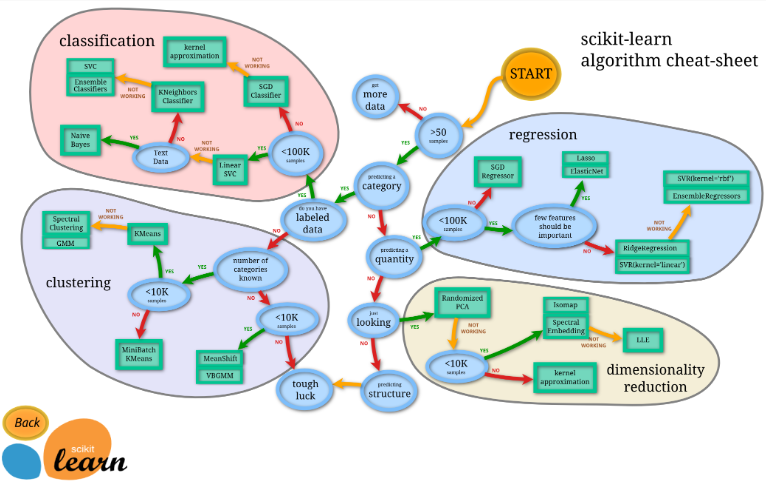

# CRISP - DM

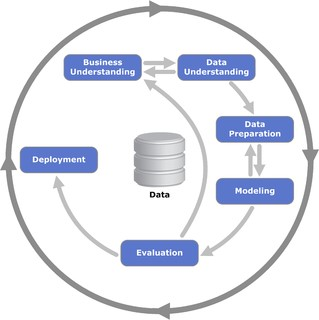

## Import Packages and Load Data

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('Spotify-2000.csv')

In [ ]:
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

pada fearure Length (Duration) seharusnya bertipe data numeric, namun terbaca object. perlu dilakukan penyesuaian pada feature ini

### Mengubah Tipe Data Yang Tidak Sesuai

In [ ]:
df[df['Length (Duration)'].str.len() > 3]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
842,843,Echoes,Pink Floyd,album rock,1971,134,32,28,-17,11,14,"1,412",37,4,58
904,905,Close to the Edge (i. The Solid Time of Change...,Yes,album rock,1972,81,60,22,-11,41,25,"1,121",27,6,47
951,952,Autobahn - 2009 Remaster,Kraftwerk,dance rock,1974,82,50,33,-16,13,11,"1,367",11,4,48
1982,1983,Get Ready,Rare Earth,blues rock,1969,127,87,41,-6,83,65,"1,292",0,4,45


dapat dilihat bahwa terdapat tanda koma yang menyebabkan data terbaca sebagai object

In [ ]:
#menghapus tanda koma pada feature Length
df['Length (Duration)'] = df['Length (Duration)'].str.replace(',', '')

In [ ]:
df['Length (Duration)'] = df['Length (Duration)'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

Yups, tipe data yang salah telah diperbaiki

### Statistik Deskriptif

In [ ]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


Statistik deskriptif memberikan informasi tentang pusat data dan sebarannya. Berikut adalah penjelasan untuk setiap metrik statistik:

* count: Jumlah data yang ada dalam kolom atribut.
* mean: Rata-rata aritmatika dari data dalam kolom atribut.
* std: Standar deviasi, yaitu ukuran sebaran data yang menunjukkan sejauh mana data tersebar di sekitar rata-ratanya.
* min: Nilai terkecil dalam kolom atribut.
* 25%: Kuartil pertama, nilai di mana 25% data terendah terletak.
* 50%: Kuartil kedua (median), nilai di mana 50% data terletak di atas dan 50% data terletak di bawahnya.
* 75%: Kuartil ketiga, nilai di mana 75% data terendah terletak.
* max: Nilai terbesar dalam kolom atribut

In [ ]:
df.describe(include='O')

,Title,Artist,Top Genre
count,1994,1994,1994
unique,1958,731,149
top,One,Queen,album rock
freq,3,37,413


Statistik deskriptif ini menggambarkan atribut-atribut lain dalam dataset lagu, yaitu "Title" (Judul), "Artist" (Artis), "Top Genre" (Genre Teratas), dan "Length (Duration)" (Durasi). Berikut adalah penjelasan untuk setiap atribut:

1. Title: Judul lagu.
* count: Jumlah data yang ada dalam kolom atribut. Terdapat 1994 judul lagu dalam dataset.
* unique: Jumlah nilai unik dalam kolom atribut. Terdapat 1958 judul lagu unik dalam dataset.
* top: Judul lagu yang paling sering muncul. Judul "One" muncul sebanyak 3 kali dalam dataset.
* freq: Frekuensi kemunculan judul lagu yang paling sering. Judul "One" muncul sebanyak 3 kali dalam dataset.

2. Artist: Nama artis yang membuat lagu.
* count: Jumlah data yang ada dalam kolom atribut. Terdapat 1994 nama artis dalam dataset.
* unique: Jumlah nilai unik dalam kolom atribut. Terdapat 731 nama artis unik dalam dataset.
* top: Nama artis yang paling sering muncul. Artis "Queen" muncul sebanyak 37 kali dalam dataset.
* freq: Frekuensi kemunculan nama artis yang paling sering. Artis "Queen" muncul sebanyak 37 kali dalam dataset.

3. Top Genre: Genre utama lagu.
* count: Jumlah data yang ada dalam kolom atribut. Terdapat 1994 genre utama lagu dalam dataset.
* unique: Jumlah nilai unik dalam kolom atribut. Terdapat 149 genre utama lagu unik dalam dataset.
* top: Genre utama yang paling sering muncul. Genre "album rock" muncul sebanyak 413 kali dalam dataset.
* freq: Frekuensi kemunculan genre utama yang paling sering. Genre "album rock" muncul sebanyak 413 kali dalam dataset.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

Nampaknya data yang digunakan sudah bersih dari null value maupun duplikat data, untuk memahami data lebih lanjut dilakukan EDA

### Exploratory Data Analysis (EDA)
EDA (Exploratory Data Analysis) adalah suatu pendekatan atau proses yang digunakan dalam analisis data untuk memahami karakteristik, pola, dan hubungan dalam dataset yang diberikan. EDA melibatkan eksplorasi data dengan menggunakan teknik visualisasi dan metode statistik untuk mengidentifikasi informasi yang berguna, memahami struktur data, dan menemukan wawasan yang dapat digunakan dalam pengambilan keputusan.

#### Melihat Target Label

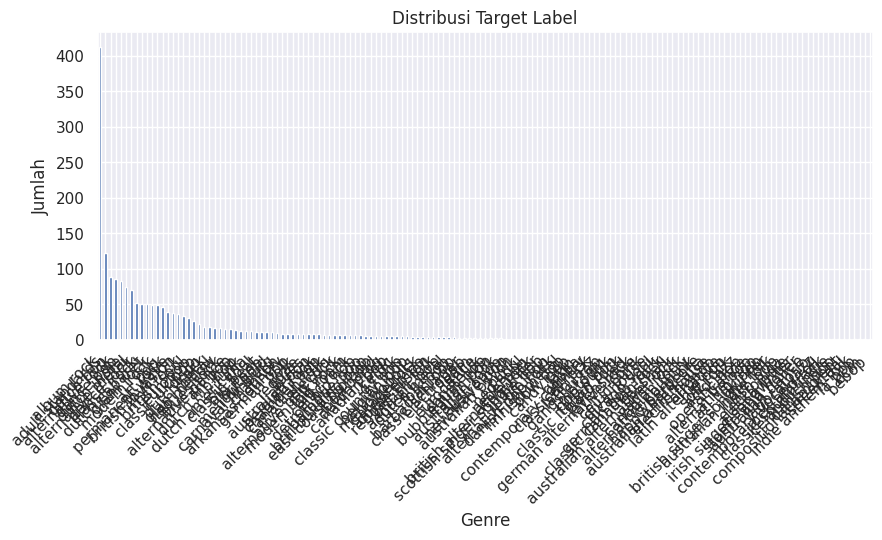

In [ ]:
counts = df['Top Genre'].value_counts()
plt.figure(figsize=(10,4), dpi=100)
counts.plot(kind='bar')
plt.title('Distribusi Target Label')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

dapat dilihat bahwa label terlalu banyak dan terdapat banyak label yang redundan, untuk mengatasi hal ini perlu dilakukan feature engineering untuk menyederhanakan target label

In [ ]:
#pertama melihat genre yang tersedia
df['Top Genre'].value_counts().sort_values(ascending=False).head(50)

album rock              413
adult standards         123
dutch pop                88
alternative rock         86
dance pop                83
dutch indie              75
alternative metal        70
dance rock               52
classic rock             51
dutch cabaret            51
glam rock                49
modern rock              49
pop                      47
art rock                 40
permanent wave           38
british invasion         36
irish rock               34
british soul             31
europop                  27
classic uk pop           22
disco                    18
dutch rock               18
glam metal               17
neo mellow               17
blues rock               15
alternative dance        15
art pop                  14
dutch hip hop            13
funk                     13
dutch americana          12
classic soul             11
big beat                 11
britpop                  11
mellow gold              11
carnaval limburg         10
german pop          

dapat dilihat bahwa ada beberapa value yang dapat digabungkan seperti album rock, alternative rock dll akan diubah menjadi rock serta dutch pop, chamber pop dll akan diubah menjadi pop

In [ ]:
#membuat copy data
df0 = df.copy()

In [ ]:
#membuat list dari genre yang tersedia
unique_genres = df['Top Genre'].unique().tolist()
unique_genres

['adult standards',
 'album rock',
 'alternative hip hop',
 'alternative metal',
 'classic rock',
 'alternative pop rock',
 'pop',
 'modern rock',
 'detroit hip hop',
 'alternative rock',
 'dutch indie',
 'garage rock',
 'dutch cabaret',
 'permanent wave',
 'classic uk pop',
 'dance pop',
 'modern folk rock',
 'dutch pop',
 'dutch americana',
 'alternative dance',
 'german pop',
 'afropop',
 'british soul',
 'irish rock',
 'disco',
 'big room',
 'art rock',
 'danish pop rock',
 'neo mellow',
 'britpop',
 'boy band',
 'carnaval limburg',
 'arkansas country',
 'latin alternative',
 'british folk',
 'celtic',
 'chanson',
 'celtic rock',
 'hip pop',
 'east coast hip hop',
 'dutch rock',
 'blues rock',
 'electro',
 'australian pop',
 'belgian rock',
 'downtempo',
 'reggae fusion',
 'british invasion',
 'finnish metal',
 'canadian pop',
 'bow pop',
 'dutch hip hop',
 'dutch metal',
 'soft rock',
 'acoustic pop',
 'acid jazz',
 'dutch prog',
 'candy pop',
 'operatic pop',
 'trance',
 'scottis

In [ ]:
# Membuat kamus untuk penyatuan label genre
genre_mapping = {
    'album rock': 'Rock',
    'alternative hip hop': 'Hip Hop',
    'alternative metal': 'Rock',
    'classic rock': 'Rock',
    'alternative pop rock': 'Rock',
    'pop': 'Pop',
    'modern rock': 'Rock',
    'detroit hip hop': 'Hip Hop',
    'alternative rock': 'Rock',
    'dutch indie': 'Indie',
    'garage rock': 'Rock',
    'dutch cabaret': 'Indie',
    'permanent wave': 'Rock',
    'classic uk pop': 'Pop',
    'dance pop': 'Pop',
    'modern folk rock': 'Folk',
    'dutch pop': 'Pop',
    'dutch americana': 'Folk',
    'alternative dance': 'Dance',
    'german pop': 'Pop',
    'british soul': 'R&B',
    'irish rock': 'Rock',
    'disco': 'Pop',
    'big room': 'Electronic',
    'art rock': 'Rock',
    'danish pop rock': 'Pop',
    'neo mellow': 'Pop',
    'britpop': 'Pop',
    'boy band': 'Pop',
    'carnaval limburg': 'Regional',
    'arkansas country': 'Country',
    'latin alternative': 'Latin',
    'british folk': 'Folk',
    'celtic': 'Folk',
    'chanson': 'Pop',
    'celtic rock': 'Rock',
    'hip pop': 'Hip Hop',
    'east coast hip hop': 'Hip Hop',
    'dutch rock': 'Rock',
    'blues rock': 'Blues',
    'electro': 'Electronic',
    'australian pop': 'Pop',
    'belgian rock': 'Rock',
    'downtempo': 'Electronic',
    'reggae fusion': 'Reggae',
    'british invasion': 'Rock',
    'finnish metal': 'Rock',
    'canadian pop': 'Pop',
    'dutch hip hop': 'Hip Hop',
    'dutch metal': 'Rock',
    'soft rock': 'Rock',
    'acoustic pop': 'Pop',
    'acid jazz': 'Jazz',
    'dutch prog': 'Rock',
    'candy pop': 'Pop',
    'operatic pop': 'Pop',
    'trance': 'Electronic',
    'scottish singer-songwriter': 'Pop',
    'mellow gold': 'Pop',
    'alternative pop': 'Pop',
    'dance rock': 'Rock',
    'atl hip hop': 'Hip Hop',
    'eurodance': 'Electronic',
    'blues': 'Blues',
    'canadian folk': 'Folk',
    'big beat': 'Electronic',
    'art pop': 'Pop',
    'uk pop': 'Pop',
    'glam metal': 'Rock',
    'brill building pop': 'Pop',
    'g funk': 'Hip Hop',
    'happy hardcore': 'Electronic',
    'belgian pop': 'Pop',
    'classic schlager': 'Pop',
    'contemporary country': 'Country',
    'barbadian pop': 'Pop',
    'gabba': 'Electronic',
    'chamber pop': 'Pop',
    'british singer-songwriter': 'Pop',
    'indie pop': 'Pop',
    'australian rock': 'Rock',
    'nederpop': 'Pop',
    'australian indie folk': 'Folk',
    'folk-pop': 'Folk',
    'electropop': 'Electronic',
    'edm': 'Electronic',
    'metropopolis': 'Electronic',
    'irish pop': 'Pop',
    'electronica': 'Electronic',
    'alaska indie': 'Indie',
    'irish singer-songwriter': 'Pop',
    'stomp and holler': 'Folk',
    'australian dance': 'Dance',
    'australian psych': 'Rock',
    'laboratorio': 'Other',
    'contemporary vocal jazz': 'Jazz',
    'rock-and-roll': 'Rock',
    'glam rock': 'Rock',
    'classic soundtrack': 'Soundtrack',
    'icelandic indie': 'Indie',
    'danish pop': 'Pop',
    'compositional ambient': 'Electronic',
    'neo soul': 'R&B',
    'streektaal': 'Regional',
    'italian pop': 'Pop',
    'indie anthem-folk': 'Indie',
    'la pop': 'Pop',
    'baroque pop': 'Pop',
    'ccm': 'Christian',
    'electro house': 'Electronic',
    'austropop': 'Pop',
    'australian americana': 'Folk',
    'latin': 'Latin',
    'chicago soul': 'R&B',
    'classic soul': 'R&B',
    'bubblegum pop': 'Pop',
    'classic country pop': 'Country',
    'europop': 'Pop',
    'hard rock': 'Rock',
    'reggae': 'Reggae',
    'j-core': 'Electronic',
    'funk': 'Funk',
    'folk': 'Folk',
    'punk': 'Punk',
    'basshall': 'Electronic',
    'australian alternative rock': 'Rock',
    'yacht rock': 'Rock',
    'alternative country': 'Country',
    'celtic punk': 'Punk',
    'new wave pop': 'Pop',
    'classic canadian rock': 'Rock',
    'christelijk': 'Other',
    'levenslied': 'Other',
    'cyberpunk': 'Other',
    'gangster rap': 'Hip Hop',
    'diva house': 'Electronic',
    'classical rock': 'Rock',
    'canadian rock': 'Rock',
    'german pop rock': 'Rock',
    'british alternative rock': 'Rock',
    'latin jazz': 'Jazz',
    'german alternative rock': 'Rock',
    'classic italian pop': 'Pop',
    'pop punk': 'Rock',
    'motown': 'R&B',
    'bebop': 'Jazz'
}

# Mengganti nilai dalam kolom "Top Genre" dengan label yang disatukan
df['Top Genre'] = df['Top Genre'].replace(genre_mapping)

In [ ]:
# Menampilkan hasil setelah penyatuan label genre dan penghapusan data
print(df['Top Genre'].value_counts())

Rock               1008
Pop                 437
Indie               129
adult standards     123
Electronic           52
Folk                 50
R&B                  46
Hip Hop              36
Blues                23
Country              17
Dance                16
Funk                 13
Reggae               12
Regional             11
Other                 6
Jazz                  4
Latin                 3
Punk                  3
bow pop               2
afropop               1
Soundtrack            1
Christian             1
Name: Top Genre, dtype: int64


dapat dilihat bahwa beberapa genre hanya memiliki sedikit data yang tidak akan terlalu berguna untuk model, oleh karena itu saya menghapus genre yang memiliki sedikit data

In [ ]:
# Melakukan penghitungan value_counts pada kolom "Top Genre"
genre_counts = df['Top Genre'].value_counts()

# Mengambil label genre yang muncul di atas 50 kali
selected_genres = genre_counts[genre_counts >= 50].index.tolist()

# Mengganti nilai dalam kolom "Top Genre" dengan label yang dipilih atau "Other" jika jumlah kemunculan di bawah atau sama dengan 20
df.loc[~df['Top Genre'].isin(selected_genres), 'Top Genre'] = 'Other'

# Menghapus data dengan label-genre yang muncul kurang dari atau sama dengan 20 kali
df = df[df['Top Genre'] != 'Other']

# Menampilkan hasil setelah penyatuan label genre dan penghapusan data
print(df['Top Genre'].value_counts())

Rock               1008
Pop                 437
Indie               129
adult standards     123
Electronic           52
Folk                 50
Name: Top Genre, dtype: int64


setelah dilakukan data preprocessing, terdapat 6 genre

#### Melakukan analisis untuk melihat karakteristik dari masing masing genre

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.to_list()
numeric_cols

['Index',
 'Year',
 'Beats Per Minute (BPM)',
 'Energy',
 'Danceability',
 'Loudness (dB)',
 'Liveness',
 'Valence',
 'Length (Duration)',
 'Acousticness',
 'Speechiness',
 'Popularity']

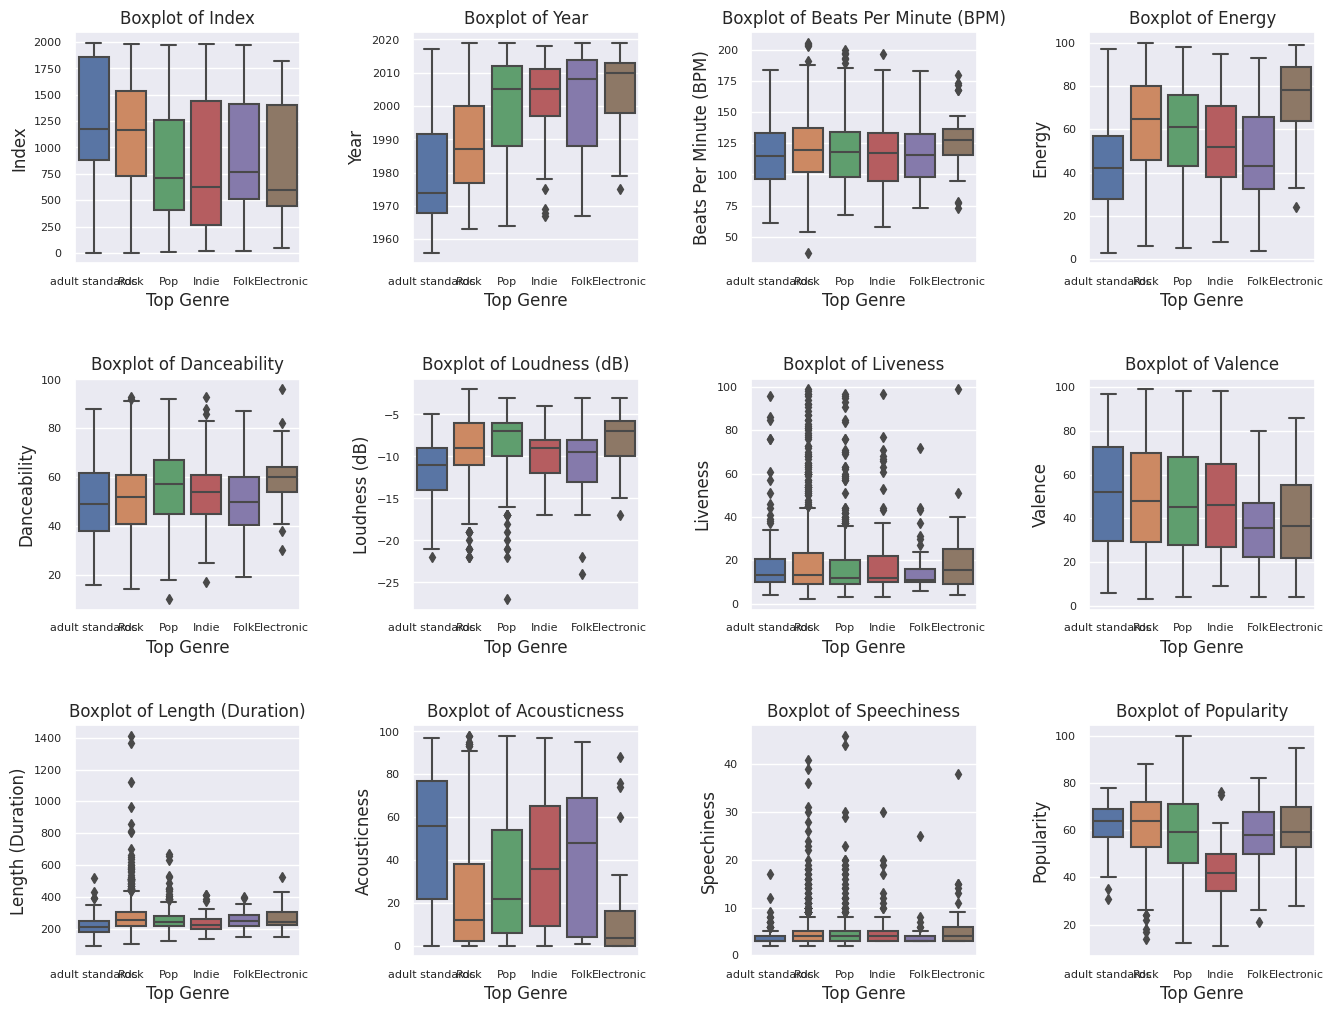

In [ ]:
# Membuat subplot dengan lebih dari satu baris
num_rows = 3
num_cols = (len(numeric_cols) + num_rows - 1) // num_rows
fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Menyesuaikan ukuran font dan jarak antar sumbu
font_size = 8
for i, col in enumerate(numeric_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax[row_idx, col_idx].tick_params(axis='both', which='both', labelsize=font_size)

    sns.boxplot(data=df, x='Top Genre', y=col, ax=ax[row_idx, col_idx])
    ax[row_idx, col_idx].set_xlabel('Top Genre')
    ax[row_idx, col_idx].set_ylabel(col)
    ax[row_idx, col_idx].set_title('Boxplot of {}'.format(col))

# Menghapus subplot yang tidak digunakan
if len(numeric_cols) < num_rows * num_cols:
    for i in range(len(numeric_cols), num_rows * num_cols):
        fig.delaxes(ax.flatten()[i])

# Menyesuaikan tata letak subplot secara manual
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

Dari boxplot di atas, berikut adalah kesimpulan yang dapat diambil:
1. Genre elektronik adalah genre musik dengan lagu-lagu yang dirilis dari tahun 1975 hingga 2019. Lagu-lagu dalam genre ini cenderung memiliki tempo sedang, tingkat energi yang tinggi, dan cocok untuk menari. Mereka umumnya memiliki kebisingan yang tinggi dan cenderung kurang akustik.
2. Genre folk memiliki lagu-lagu yang dirilis dari tahun 1967 hingga 2019. Lagu-lagu ini memiliki tempo yang sedikit lebih lambat, tingkat energi yang rendah, dan lebih cocok untuk suasana yang tenang. Mereka juga memiliki tingkat keaslian akustik yang tinggi.
3. Genre indie memiliki lagu-lagu yang dirilis dari tahun 1967 hingga 2018. Mereka memiliki tempo sedang, tingkat energi yang rendah, dan cocok untuk suasana yang santai. Lagu-lagu indie cenderung lebih akustik daripada genre lainnya.
4. Genre rock memiliki lagu-lagu yang dirilis dari tahun 1949 hingga 2019. Mereka memiliki tempo yang cepat, tingkat energi yang tinggi, dan cenderung cocok untuk menari. Lagu-lagu ini juga memiliki kebisingan yang tinggi dan sedikit unsur akustik.
5. Genre hip-hop memiliki lagu-lagu yang dirilis dari tahun 1979 hingga 2019. Mereka memiliki tempo sedang, tingkat energi yang sedang, dan sangat cocok untuk menari. Lagu-lagu ini cenderung memiliki kebisingan yang rendah dan sedikit unsur akustik.

**angka lebih jelasnya bisa lihat dibawah ini**

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.groupby('Top Genre').describe()

Index                                                 \
                  count         mean         std   min     25%     50%   
Top Genre                                                                
Electronic         52.0   841.538462  560.287477  42.0  449.00   597.0   
Folk               50.0   875.240000  553.967602  22.0  512.25   769.5   
Indie             129.0   821.992248  616.499639  13.0  261.00   621.0   
Pop               437.0   831.812357  547.913483   7.0  405.00   709.0   
Rock             1008.0  1103.947421  545.470243   2.0  731.50  1161.5   
adult standards   123.0  1253.170732  606.803824   1.0  880.50  1179.0   

                                    Year                                  \
                     75%     max   count         mean        std     min   
Top Genre                                                                  
Electronic       1404.25  1817.0    52.0  2005.865385  10.261347  1975.0   
Folk             1413.75  1976.0    50.0  1999.740000  16.531738  1967.0   
Indie            1444.00  1978.0   129.0  2002.542636  11.777898  1967.0   
Pop              1261.00  1972.0   437.0  2000.013730  14.850935  1964.0   
Rock             1540.25  1985.0  1008.0  1988.718254  14.645971  1963.0   
adult standards  1858.00  1994.0   123.0  1979.016260  15.413420  1956.0   

                                                 Beats Per Minute (BPM)  \
                    25%     50%      75%     max                  count   
Top Genre                                                                 
Electronic       1998.0  2010.0  2013.00  2019.0                   52.0   
Folk             1988.0  2008.0  2013.75  2019.0                   50.0   
Indie            1997.0  2005.0  2011.00  2018.0                  129.0   
Pop              1988.0  2005.0  2012.00  2019.0                  437.0   
Rock             1977.0  1987.0  2000.00  2019.0                 1008.0   
adult standards  1968.0  1974.0  1991.50  2017.0                  123.0   

                                                                            \
                       mean        std   min     25%    50%     75%    max   
Top Genre                                                                    
Electronic       126.730769  22.628384  73.0  115.75  128.0  136.25  180.0   
Folk             116.820000  27.372480  73.0   98.25  116.0  132.75  183.0   
Indie            118.178295  29.410205  58.0   95.00  117.0  133.00  197.0   
Pop              119.311213  29.073605  67.0   98.00  118.0  134.00  200.0   
Rock             121.106151  26.540289  37.0  102.00  120.0  137.00  206.0   
adult standards  117.105691  28.898866  61.0   96.50  115.0  133.50  184.0   

                 Energy                                                        \
                  count       mean        std   min    25%   50%   75%    max   
Top Genre                                                                       
Electronic         52.0  73.346154  18.888615  24.0  64.00  78.0  89.0   99.0   
Folk               50.0  46.740000  21.409334   4.0  32.25  43.0  65.5   93.0   
Indie             129.0  53.767442  20.874069   8.0  38.00  52.0  71.0   95.0   
Pop               437.0  59.038902  21.425267   5.0  43.00  61.0  76.0   98.0   
Rock             1008.0  62.707341  21.584932   6.0  46.00  65.0  80.0  100.0   
adult standards   123.0  42.658537  19.874949   3.0  28.00  42.0  57.0   97.0   

                Danceability                                                 \
                       count       mean        std   min    25%   50%   75%   
Top Genre                                                                     
Electronic              52.0  60.288462  11.160744  30.0  53.75  60.0  64.0   
Folk                    50.0  50.180000  14.852595  19.0  40.25  50.0  60.0   
Indie                  129.0  53.643411  13.861366  17.0  45.00  54.0  61.0   
Pop                    437.0  56.043478  16.004312  10.0  45.00  57.0  67.0   
Rock

Berdasarkan statistik deskriptif yang diberikan, berikut adalah karakteristik dari masing-masing top genre:
1.	Electronic:
* Year: Rentang tahun rilis lagu-lagu dalam genre ini adalah antara tahun 1975 hingga 2019.
* Beats Per Minute (BPM): Rata-rata BPM adalah sekitar 126, dengan variasi yang relatif kecil.
* Energy: Rata-rata tingkat energi lagu-lagu dalam genre ini adalah sekitar 73.
* Danceability: Rata-rata tingkat kecocokan untuk menari adalah sekitar 73.
* Loudness (dB): Rata-rata loudness adalah sekitar -7.94 dB, menunjukkan tingkat kebisingan yang relatif tinggi.
* Liveness: Rata-rata tingkat kehidupan panggung dalam lagu-lagu genre ini adalah sekitar 18.96.
* Valence: Rata-rata tingkat kesenangan lagu-lagu dalam genre ini adalah sekitar 38.96.
* Length (Duration): Rata-rata durasi lagu dalam genre ini adalah sekitar 267.63 detik.
* Acousticness: Rata-rata tingkat keaslian akustik lagu-lagu dalam genre ini adalah sekitar 11.67.
* Speechiness: Rata-rata tingkat pengucapan dalam lagu-lagu genre ini adalah sekitar 5.87.
* Popularity: Rata-rata popularitas lagu-lagu dalam genre ini adalah sekitar 60.75.
2.	Folk:
* Year: Rentang tahun rilis lagu-lagu dalam genre ini adalah antara tahun 1967 hingga 2019.
* Beats Per Minute (BPM): Rata-rata BPM adalah sekitar 116.82, dengan variasi yang relatif tinggi.
* Energy: Rata-rata tingkat energi lagu-lagu dalam genre ini adalah sekitar 46.74.
* Danceability: Rata-rata tingkat kecocokan untuk menari adalah sekitar 50.18.
* Loudness (dB): Rata-rata loudness adalah sekitar -10.5 dB, menunjukkan tingkat kebisingan yang relatif rendah.
* Liveness: Rata-rata tingkat kehidupan panggung dalam lagu-lagu genre ini adalah sekitar 15.82.
* Valence: Rata-rata tingkat kesenangan lagu-lagu dalam genre ini adalah sekitar 37.96.
* Length (Duration): Rata-rata durasi lagu dalam genre ini adalah sekitar 257.26 detik.
* Acousticness: Rata-rata tingkat keaslian akustik lagu-lagu dalam genre ini adalah sekitar 41.48.
* Speechiness: Rata-rata tingkat pengucapan dalam lagu-lagu genre ini adalah sekitar 4.1.
* Popularity: Rata-rata popularitas lagu-lagu dalam genre ini adalah sekitar 57.02.
3.	Indie:
* Year: Rentang tahun rilis lagu-lagu dalam genre ini adalah antara tahun 1967 hingga 2018.
* Beats Per Minute (BPM): Rata-rata BPM adalah sekitar 118.18, dengan variasi yang bervariasi.
* Energy: Rata-rata tingkat energi lagu-lagu dalam genre ini adalah sekitar 48.42.
* Danceability: Rata-rata tingkat kecocokan untuk menari adalah sekitar 49.95.
* Loudness (dB): Rata-rata loudness adalah sekitar -10.91 dB, menunjukkan tingkat kebisingan yang relatif rendah.
* Liveness: Rata-rata tingkat kehidupan panggung dalam lagu-lagu genre ini adalah sekitar 18.38.
* Valence: Rata-rata tingkat kesenangan lagu-lagu dalam genre ini adalah sekitar 46.58.
* Length (Duration): Rata-rata durasi lagu dalam genre ini adalah sekitar 243.98 detik.
* Acousticness: Rata-rata tingkat keaslian akustik lagu-lagu dalam genre ini adalah sekitar 22.70.
* Speechiness: Rata-rata tingkat pengucapan dalam lagu-lagu genre ini adalah sekitar 6.92.
* Popularity: Rata-rata popularitas lagu-lagu dalam genre ini adalah sekitar 42.18.
4.	Rock:
* Year: Rentang tahun rilis lagu-lagu dalam genre ini adalah antara tahun 1949 hingga 2019.
* Beats Per Minute (BPM): Rata-rata BPM adalah sekitar 128.89, dengan variasi yang cukup tinggi.
* Energy: Rata-rata tingkat energi lagu-lagu dalam genre ini adalah sekitar 74.61.
* Danceability: Rata-rata tingkat kecocokan untuk menari adalah sekitar 52.35.
* Loudness (dB): Rata-rata loudness adalah sekitar -7.38 dB, menunjukkan tingkat kebisingan yang relatif tinggi.
* Liveness: Rata-rata tingkat kehidupan panggung dalam lagu-lagu genre ini adalah sekitar 19.58.
* Valence: Rata-rata tingkat kesenangan lagu-lagu dalam genre ini adalah sekitar 52.95.
* Length (Duration): Rata-rata durasi lagu dalam genre ini adalah sekitar 263.49 detik.
* Acousticness: Rata-rata tingkat keaslian akustik lagu-lagu dalam genre ini adalah sekitar 12.11.
* Speechiness: Rata-rata tingkat pengucapan dalam lagu-lagu genre ini adalah sekitar 5.03.
* Popularity: Rata-rata popularitas lagu-lagu dalam genre ini adalah sekitar 59.51.
5.	Hip-Hop:
* Year: Rentang tahun rilis lagu-lagu dalam genre ini adalah antara tahun 1979 hingga 2019.
* Beats Per Minute (BPM): Rata-rata BPM adalah sekitar 112.68, dengan variasi yang relatif kecil.
* Energy: Rata-rata tingkat energi lagu-lagu dalam genre ini adalah sekitar 63.56.
* Danceability: Rata-rata tingkat kecocokan untuk menari adalah sekitar 66.41.
* Loudness (dB): Rata-rata loudness adalah sekitar -9.64 dB, menunjukkan tingkat kebisingan yang relatif rendah.
* Liveness: Rata-rata tingkat kehidupan panggung dalam lagu-lagu genre ini adalah sekitar 17.69.
* Valence: Rata-rata tingkat kesenangan lagu-lagu dalam genre ini adalah sekitar 42.69.
* Length (Duration): Rata-rata durasi lagu dalam genre ini adalah sekitar 255.93 detik.
* Acousticness: Rata-rata tingkat keaslian akustik lagu-lagu dalam genre ini adalah sekitar 15.74.
* Speechiness: Rata-rata tingkat pengucapan dalam lagu-lagu genre ini adalah sekitar 19.86.
* Popularity: Rata-rata popularitas lagu-lagu dalam genre ini adalah sekitar 55.96.

#### Distribusi dari setiap genre

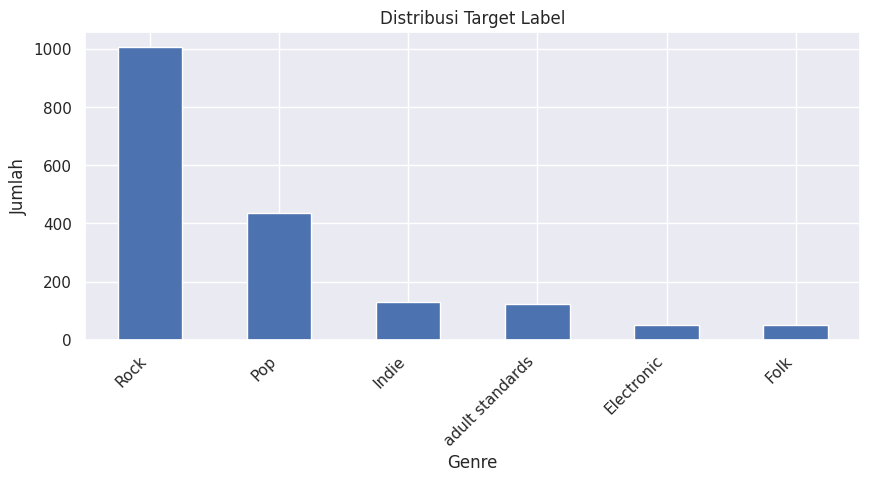

In [ ]:
counts = df['Top Genre'].value_counts()
plt.figure(figsize=(10,4), dpi=100)
counts.plot(kind='bar')
plt.title('Distribusi Target Label')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Distribusi genre berdasarkan tahun

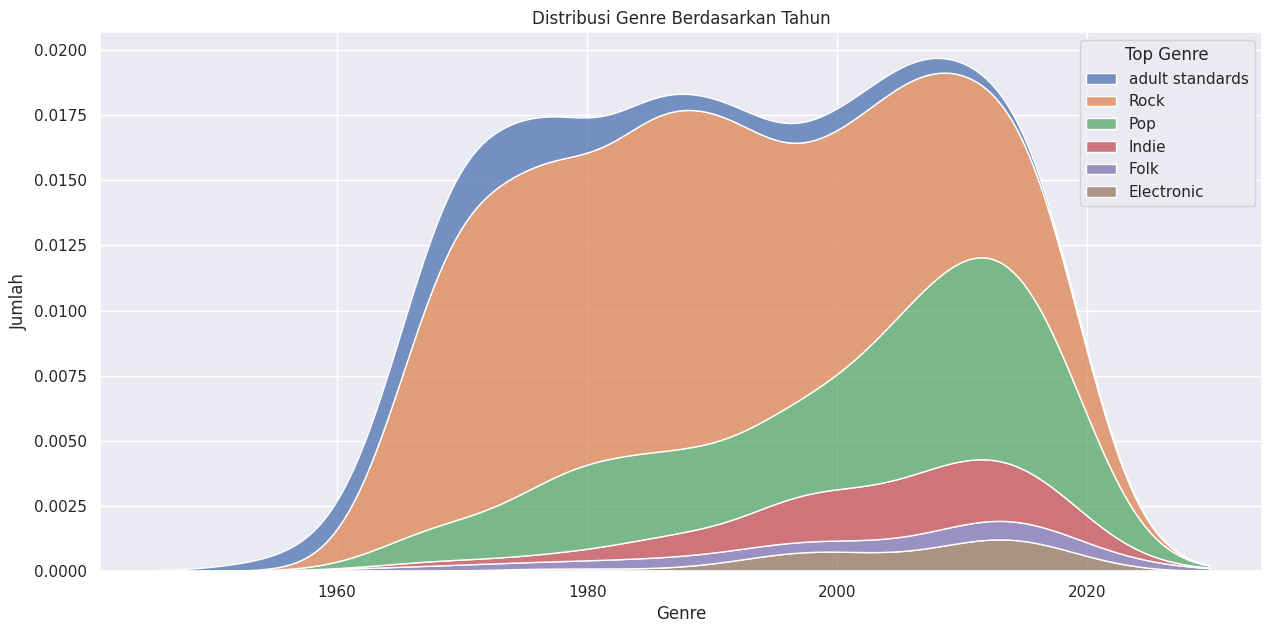

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='Year', hue='Top Genre', multiple="stack")
plt.xlabel("Genre")
plt.ylabel("Jumlah")
plt.title("Distribusi Genre Berdasarkan Tahun")
plt.show()

#### Distribusi genre berdasarkan BPM

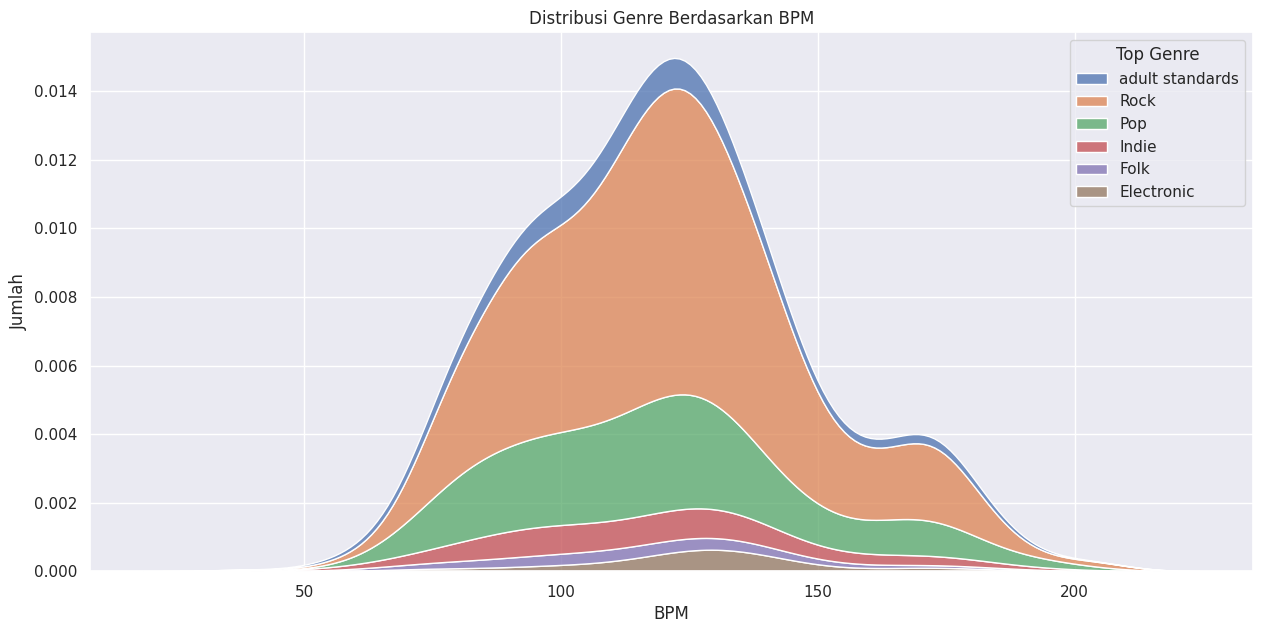

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='Beats Per Minute (BPM)', hue='Top Genre', multiple="stack")
plt.xlabel("BPM")
plt.ylabel("Jumlah")
plt.title("Distribusi Genre Berdasarkan BPM")
plt.show()

#### Distribusi genre berdasarkan Energy

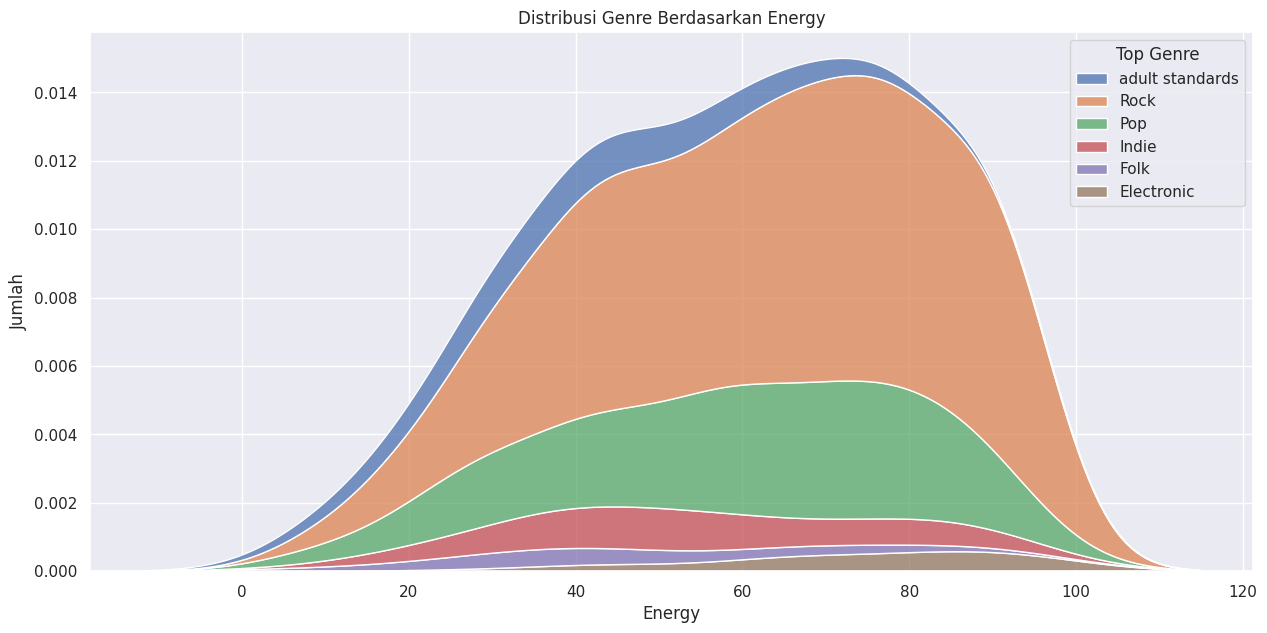

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='Energy', hue='Top Genre', multiple="stack")
plt.xlabel("Energy")
plt.ylabel("Jumlah")
plt.title("Distribusi Genre Berdasarkan Energy")
plt.show()

#### Distribusi genre berdasarkan danceability

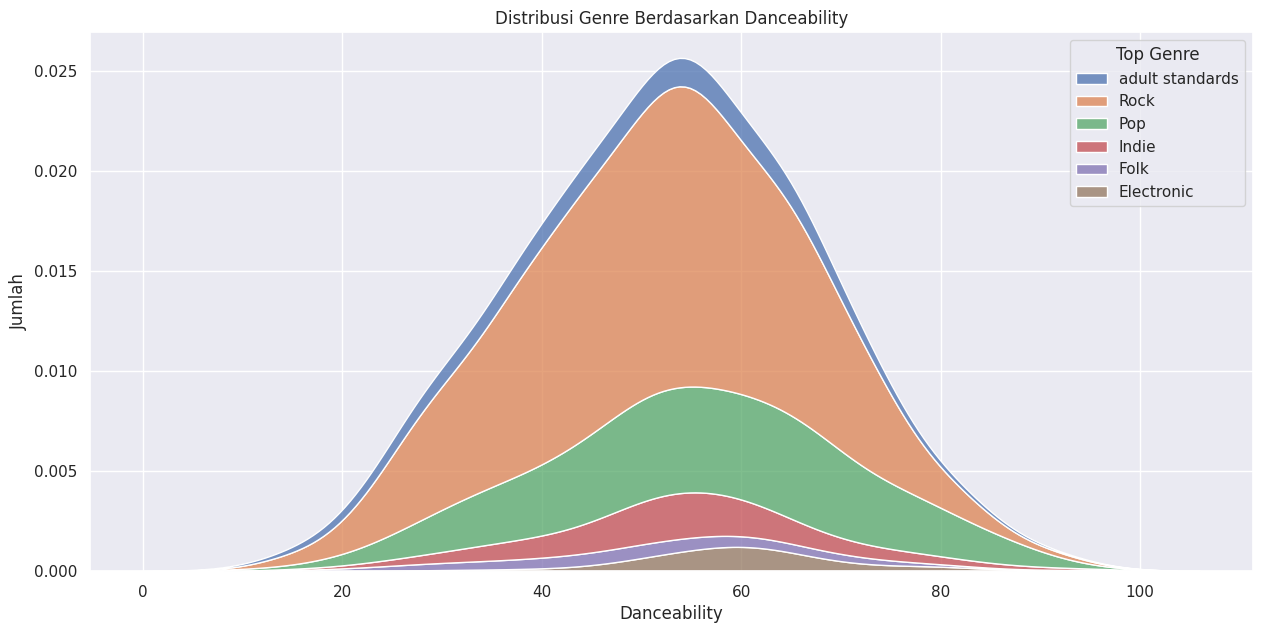

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='Danceability', hue='Top Genre', multiple="stack")
plt.xlabel("Danceability")
plt.ylabel("Jumlah")
plt.title("Distribusi Genre Berdasarkan Danceability")
plt.show()

#### Distribusi genre berdasarkan dB

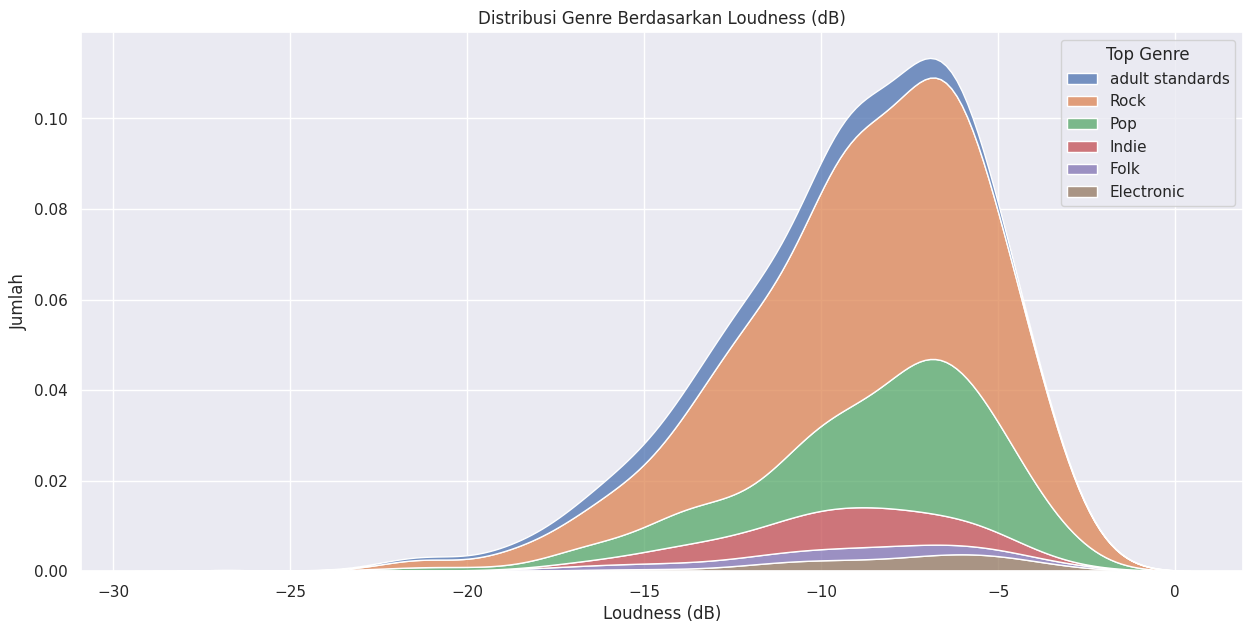

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='Loudness (dB)', hue='Top Genre', multiple="stack")
plt.xlabel("Loudness (dB)")
plt.ylabel("Jumlah")
plt.title("Distribusi Genre Berdasarkan Loudness (dB)")
plt.show()

#### Distribusi genre berdasarkan Liveness

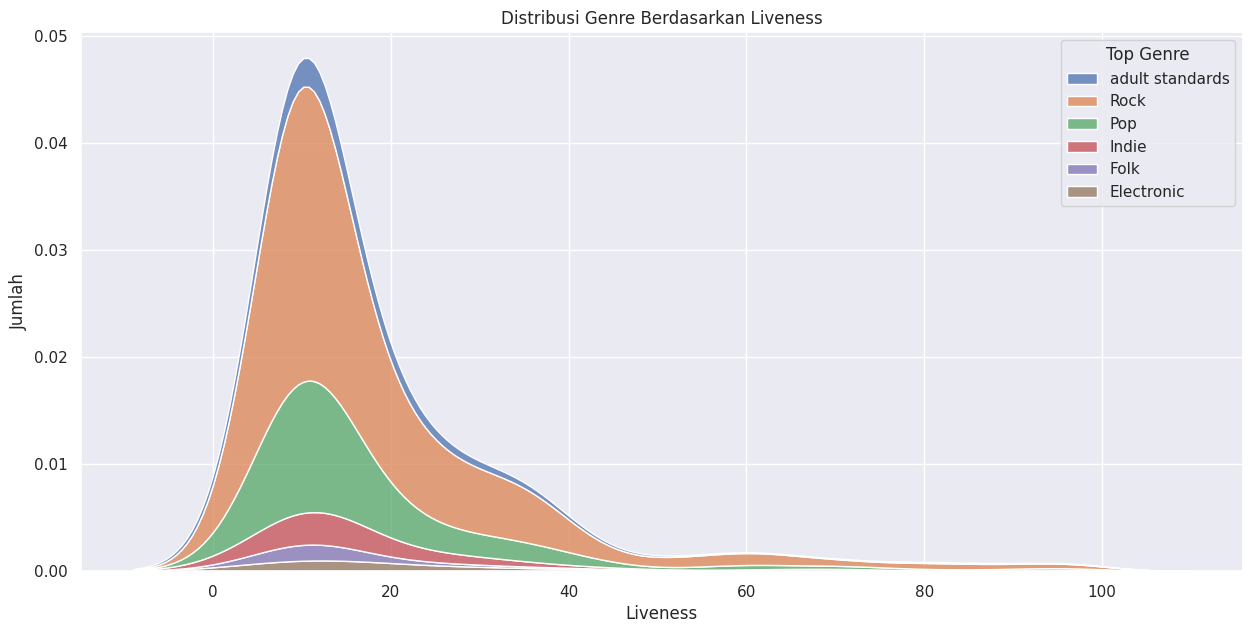

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='Liveness', hue='Top Genre', multiple="stack")
plt.xlabel("Liveness")
plt.ylabel("Jumlah")
plt.title("Distribusi Genre Berdasarkan Liveness")
plt.show()

#### Distribusi genre berdasarkan valence

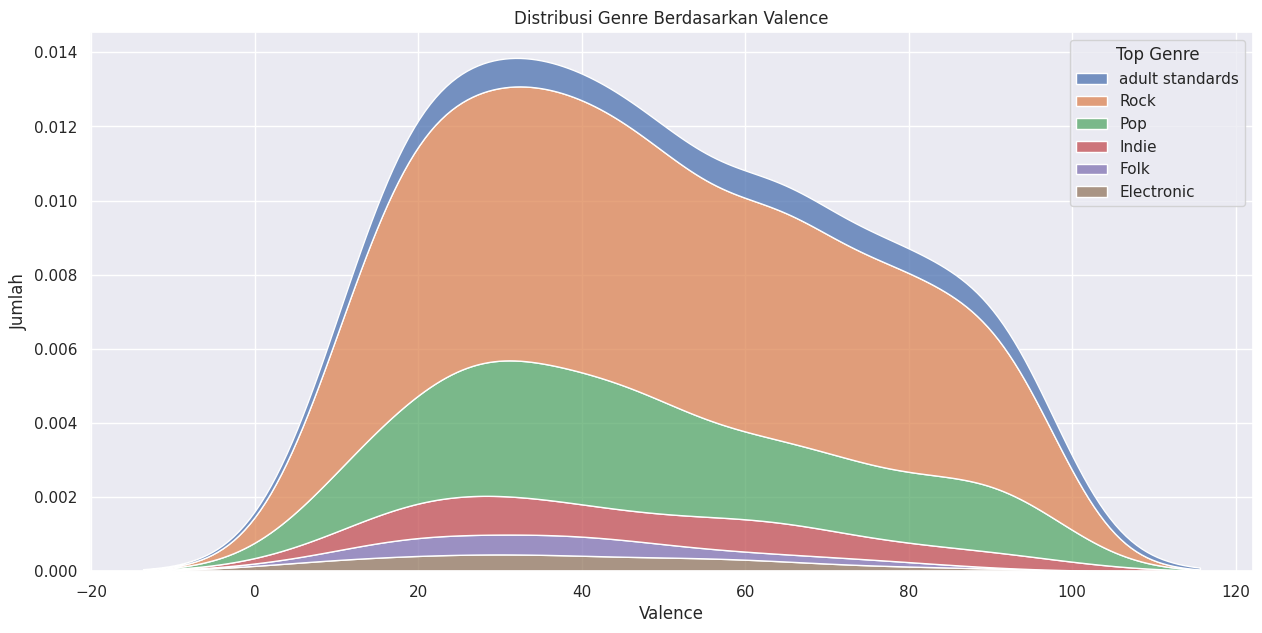

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='Valence', hue='Top Genre', multiple="stack")
plt.xlabel("Valence")
plt.ylabel("Jumlah")
plt.title("Distribusi Genre Berdasarkan Valence")
plt.show()

#### Distribusi genre berdasarkan duration

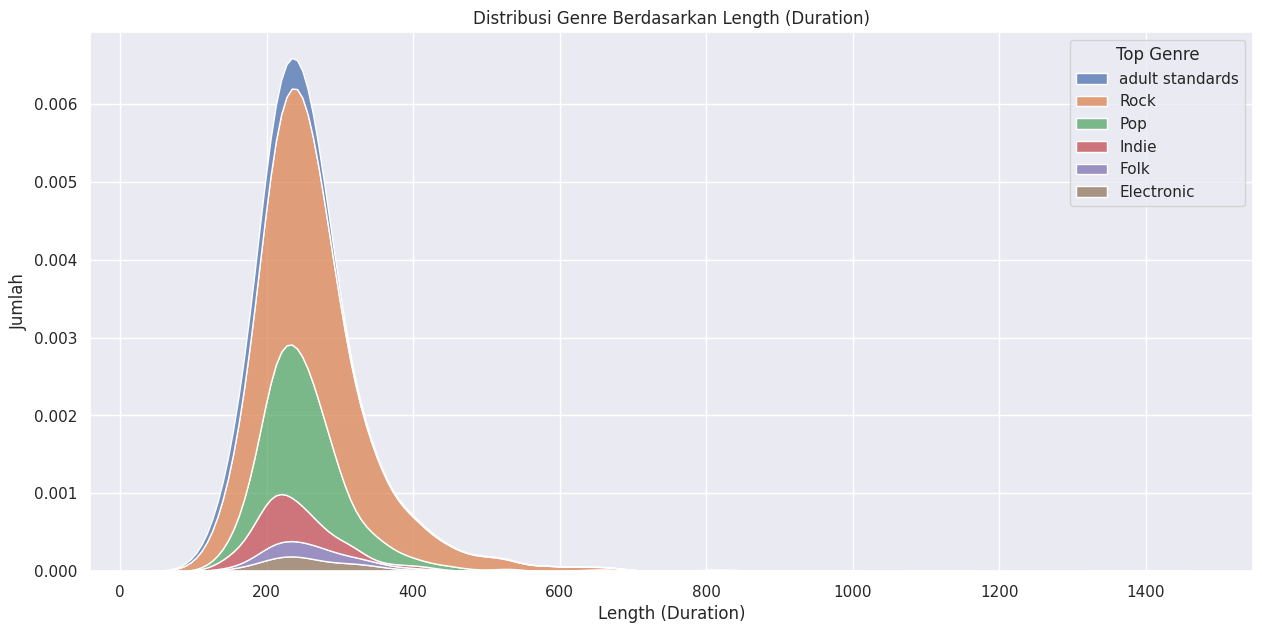

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='Length (Duration)', hue='Top Genre', multiple="stack")
plt.xlabel("Length (Duration)")
plt.ylabel("Jumlah")
plt.title("Distribusi Genre Berdasarkan Length (Duration)")
plt.show()

## Data Preprocessing

### Handling Outlier

In [ ]:
cols = numeric_cols[2:]
cols

['Beats Per Minute (BPM)',
 'Energy',
 'Danceability',
 'Loudness (dB)',
 'Liveness',
 'Valence',
 'Length (Duration)',
 'Acousticness',
 'Speechiness',
 'Popularity']

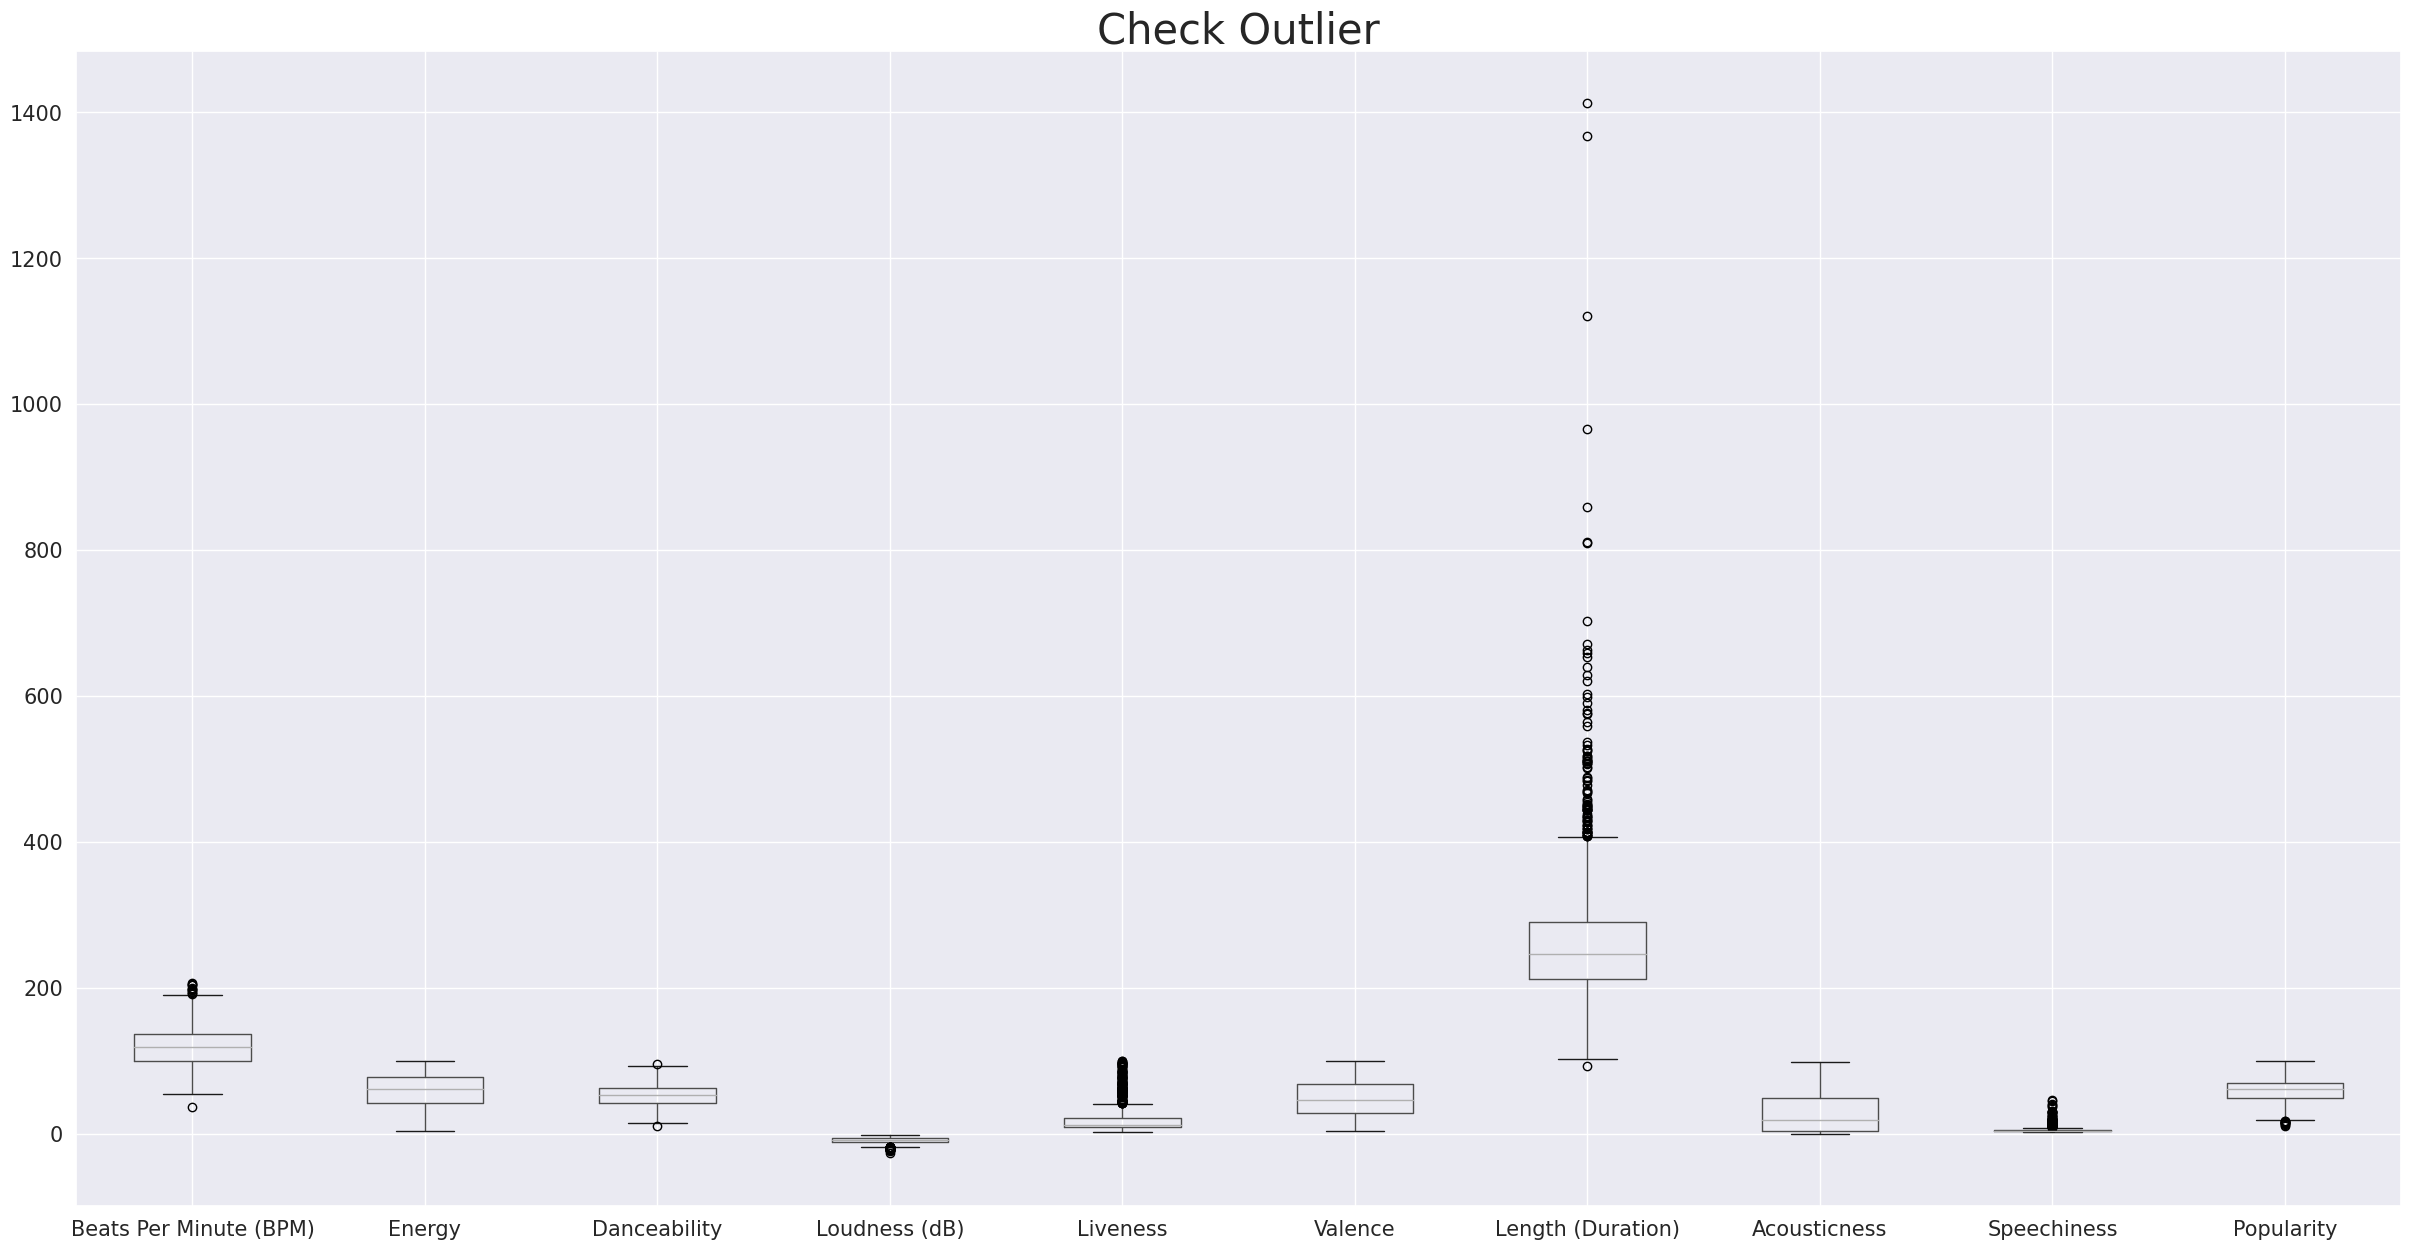

In [ ]:
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Check Outlier", fontsize=30)
plt.show()

Nampaknya terdapat nilai yang jauh di atas yang lainnya pada feature Length. Untuk melihat apakah nilai tersebut merupakan outlier perlu dilakukan pengecekan

In [ ]:
df['Length (Duration)'].sort_values(ascending=False).head(20)

842     1412
951     1367
904     1121
1166     966
1205     859
965      811
490      809
1884     703
707      671
818      663
1446     659
1034     653
13       639
40       629
799      620
151      602
670      598
1043     590
880      581
977      576
Name: Length (Duration), dtype: int64

Handling outlier dengan drop data nilai Length di atas 800

In [ ]:
df = df[df['Length (Duration)'] < 1000]

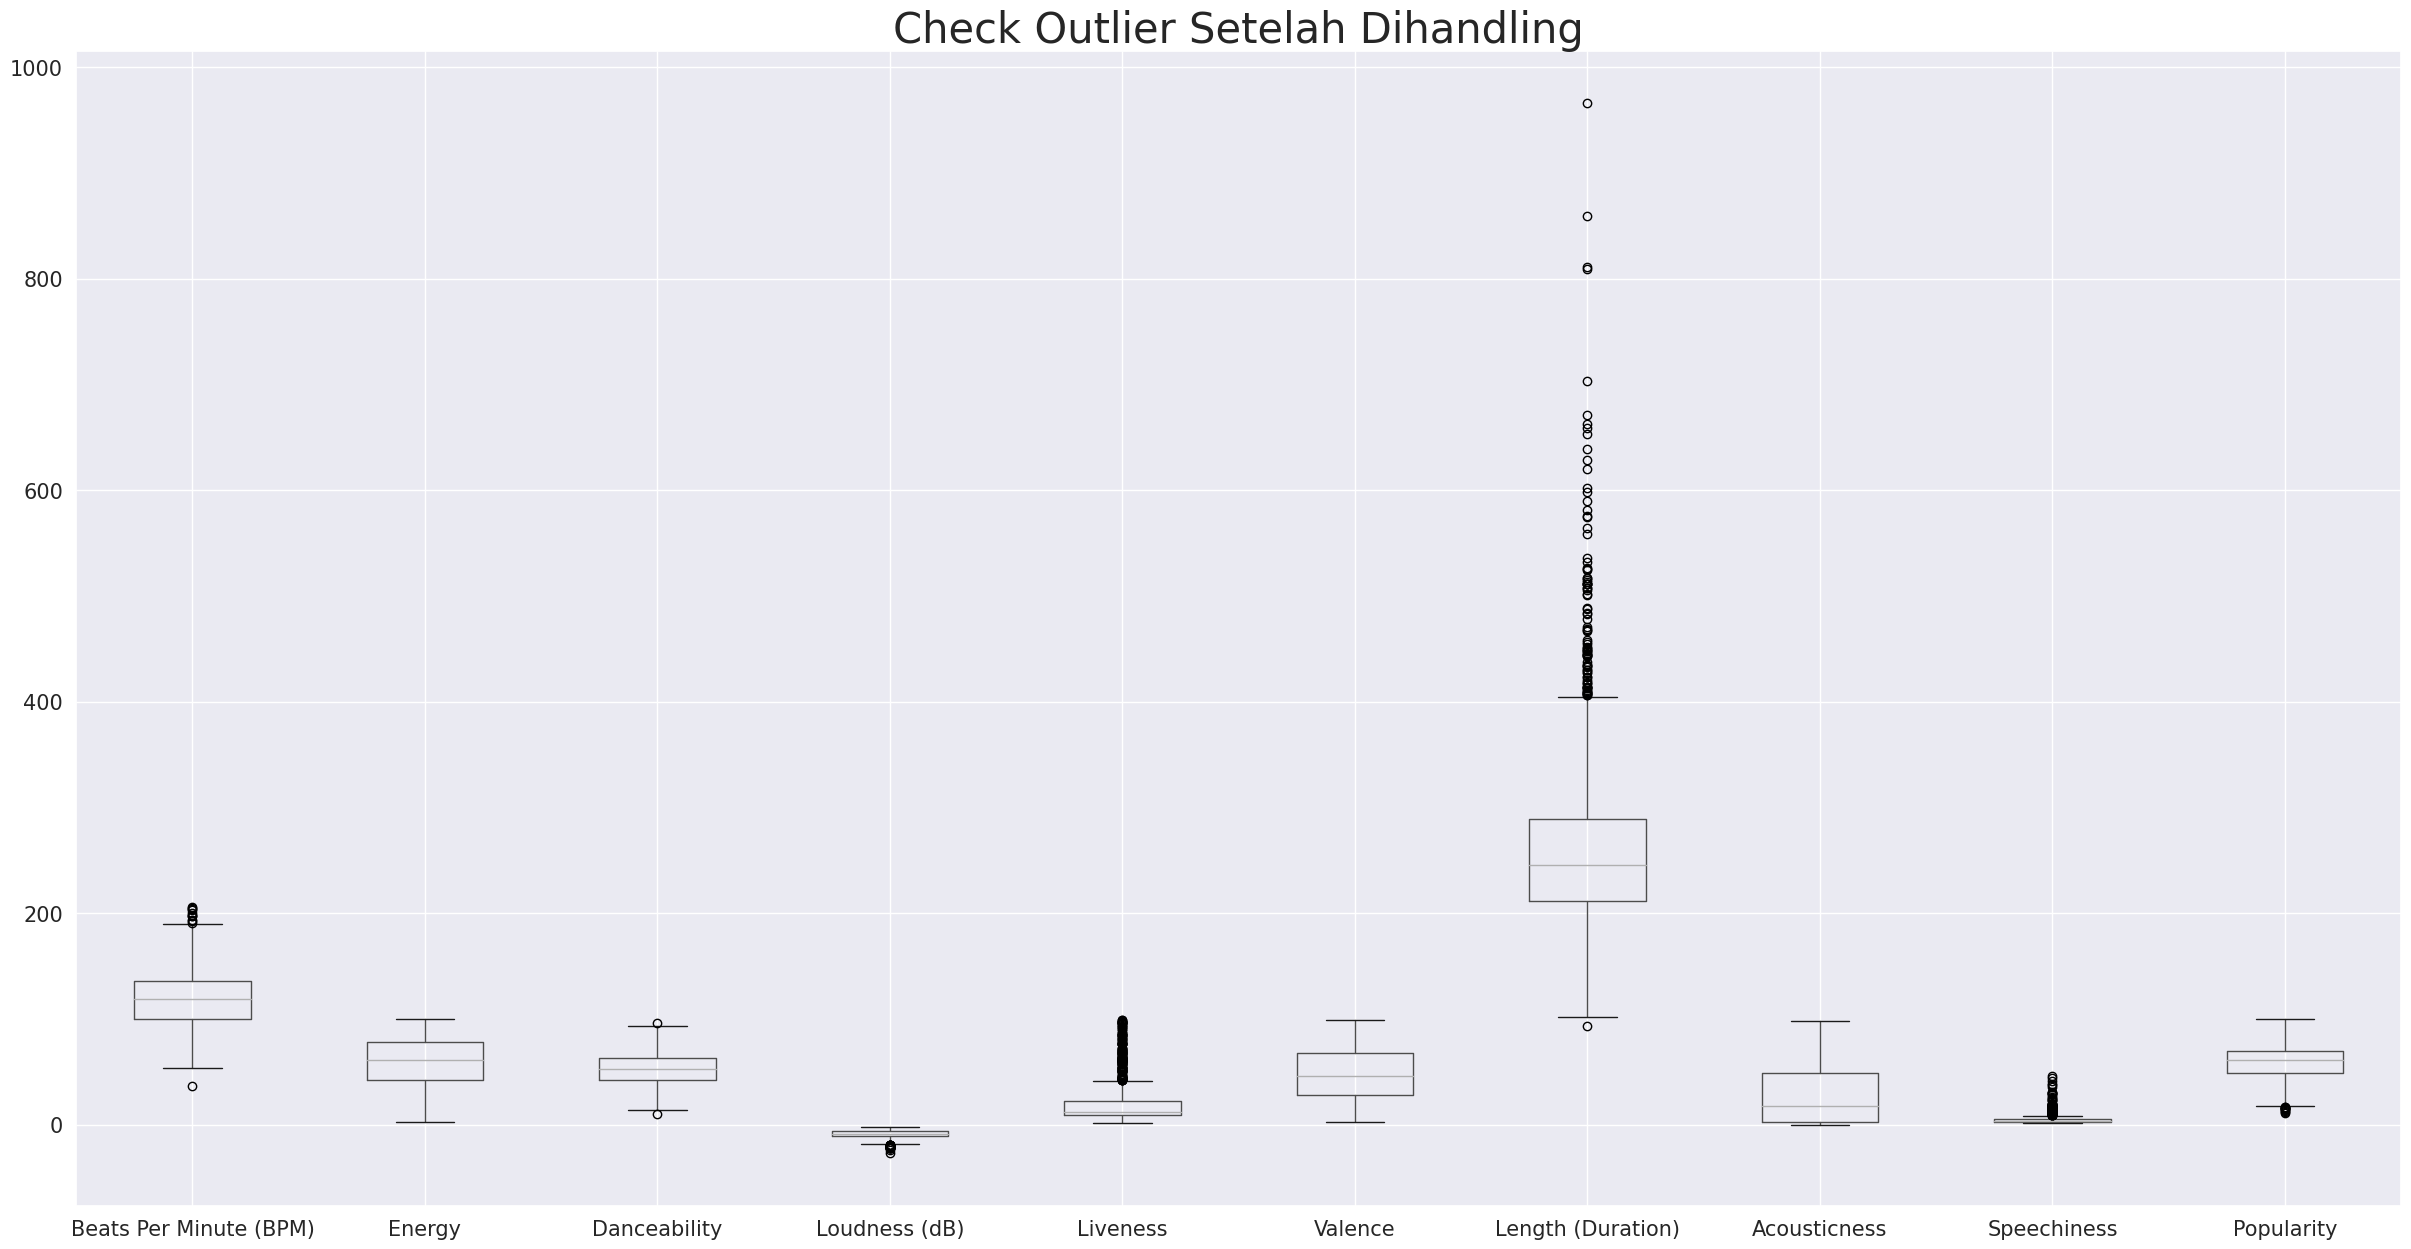

In [ ]:
#check outlier setelah dihandling
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Check Outlier Setelah Dihandling", fontsize=30)
plt.show()

### Menentukan input kolom dan target kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1796 non-null   int64 
 1   Title                   1796 non-null   object
 2   Artist                  1796 non-null   object
 3   Top Genre               1796 non-null   object
 4   Year                    1796 non-null   int64 
 5   Beats Per Minute (BPM)  1796 non-null   int64 
 6   Energy                  1796 non-null   int64 
 7   Danceability            1796 non-null   int64 
 8   Loudness (dB)           1796 non-null   int64 
 9   Liveness                1796 non-null   int64 
 10  Valence                 1796 non-null   int64 
 11  Length (Duration)       1796 non-null   int64 
 12  Acousticness            1796 non-null   int64 
 13  Speechiness             1796 non-null   int64 
 14  Popularity              1796 non-null   int64 
dtypes: i

In [ ]:
input_cols = list(df.columns)[4:-1]
target_col = 'Top Genre'

In [ ]:
#feature yang digunakan sebagai input model
input_cols

['Year',
 'Beats Per Minute (BPM)',
 'Energy',
 'Danceability',
 'Loudness (dB)',
 'Liveness',
 'Valence',
 'Length (Duration)',
 'Acousticness',
 'Speechiness']

In [ ]:
#feature yang digunakan sebagai target model
target_col

'Top Genre'

In [ ]:
# menentukan numeric and categorical kolom
numeric_cols = df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df[input_cols].select_dtypes(include='object').columns.tolist()

In [ ]:
numeric_cols

['Year',
 'Beats Per Minute (BPM)',
 'Energy',
 'Danceability',
 'Loudness (dB)',
 'Liveness',
 'Valence',
 'Length (Duration)',
 'Acousticness',
 'Speechiness']

In [ ]:
categorical_cols

[]

Okay, nampaknya semua feature yang digunakan sebagai input merupakan numerik, sehingga kita hanya perlu melakukan feature scaling

### Feature Scaling

Di sini kita pakai MinMaxScaler ygy, karena berdasarkan data statistik tadi, memiliki skala yang berbeda seperti Beats Per Minute (BPM), Loudness (dB), atau durasi lagu dalam detik, menggunakan MinMaxScaler dapat membantu kita dalam memperoleh pemahaman yang lebih baik tentang perbedaan antara variabel-variabel ini dalam masing-masing genre musik. Dengan menggunakan MinMaxScaler, setiap variabel dapat diperbandingkan dalam rentang nilai yang serupa, sehingga memudahkan kita untuk mengidentifikasi pola atau perbedaan yang mungkin terjadi antara genre-genre tersebut.

**yaa nanti cari yaa jurnal tentang MinMaxScaling buat penulisannya**

In [ ]:
#ini statistik deskriptif sebelum discaling
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1796.000000,1796.000000,1796.00000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000
mean,1014.075724,1992.625835,120.26559,59.688753,52.667038,-9.069042,18.705457,49.038976,261.048998,28.445434,4.723831,59.382517
std,574.308972,16.056734,27.48269,22.150674,14.919298,3.620542,16.327859,24.799039,81.395502,28.904257,3.773609,14.434526
min,1.000000,1956.000000,37.00000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.000000
25%,518.750000,1979.000000,100.00000,42.000000,42.000000,-11.000000,9.000000,28.000000,212.000000,3.000000,3.000000,49.000000
50%,1022.500000,1993.000000,119.00000,61.000000,53.000000,-9.000000,12.000000,46.500000,246.000000,18.000000,4.000000,61.000000
75%,1511.250000,2007.000000,136.00000,78.000000,63.000000,-6.000000,22.000000,68.000000,289.250000,49.000000,5.000000,70.000000
max,1994.000000,2019.000000,206.00000,100.000000,96.000000,-2.000000,99.000000,99.000000,966.000000,98.000000,46.000000,100.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [ ]:
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [ ]:
#ini sesudah scaling
df[numeric_cols].describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness
count,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000
mean,0.581362,0.492696,0.584420,0.496128,0.717238,0.172221,0.479573,0.192496,0.290260,0.061905
std,0.254869,0.162619,0.228357,0.173480,0.144822,0.168328,0.258323,0.093237,0.294941,0.085764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.365079,0.372781,0.402062,0.372093,0.640000,0.072165,0.260417,0.136312,0.030612,0.022727
50%,0.587302,0.485207,0.597938,0.500000,0.720000,0.103093,0.453125,0.175258,0.183673,0.045455
75%,0.809524,0.585799,0.773196,0.616279,0.840000,0.206186,0.677083,0.224800,0.500000,0.068182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Define X,y untuk modeling

In [ ]:
# X ini input modelnya
X = df[numeric_cols]
X

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness
0,0.761905,0.710059,0.278351,0.500000,0.52,0.092784,0.677083,0.123711,0.959184,0.022727
1,0.698413,0.579882,0.783505,0.465116,0.64,0.154639,0.812500,0.130584,0.173469,0.113636
3,0.809524,0.804734,0.958763,0.383721,0.92,0.010309,0.354167,0.201604,0.000000,0.045455
4,0.730159,0.408284,0.814433,0.558140,0.88,0.082474,0.875000,0.186712,0.010204,0.022727
5,0.761905,0.366864,0.443299,0.511628,0.72,0.123711,0.114583,0.176403,0.000000,0.000000
6,0.730159,0.384615,0.701031,0.709302,0.84,0.113402,0.531250,0.187858,0.061224,0.022727
7,0.793651,0.591716,0.958763,0.313953,0.88,0.103093,0.187500,0.312715,0.000000,0.272727
8,0.761905,0.656805,0.917526,0.302326,0.92,0.082474,0.208333,0.148912,0.000000,0.136364
10,0.730159,0.426036,0.020619,0.395349,0.44,0.092784,0.291667,0.079038,0.897959,0.045455
11,0.746032,0.514793,0.443299,0.744186,0.76,0.247423,0.302083,0.159221,0.010204,0.136364


In [ ]:
# y target labelnya
y = df[target_col]
y

0       adult standards
1                  Rock
3                  Rock
4                  Rock
5                  Rock
6                   Pop
7                  Rock
8                  Rock
10      adult standards
11                 Rock
12                Indie
13                 Rock
14                 Rock
15                Indie
16                 Rock
17                 Rock
18                  Pop
19                  Pop
20                 Rock
21                 Folk
22                  Pop
23                 Rock
24                  Pop
25                 Folk
28                  Pop
30                 Rock
31                 Rock
33      adult standards
35                  Pop
36                 Rock
37                 Rock
38                 Rock
39                  Pop
40                  Pop
41           Electronic
42                 Rock
43                 Rock
44                 Rock
45                  Pop
46                 Rock
47                 Rock
48      adult st

### Handling Imbalance

In [ ]:
y.value_counts()

Rock               1005
Pop                 437
Indie               129
adult standards     123
Electronic           52
Folk                 50
Name: Top Genre, dtype: int64

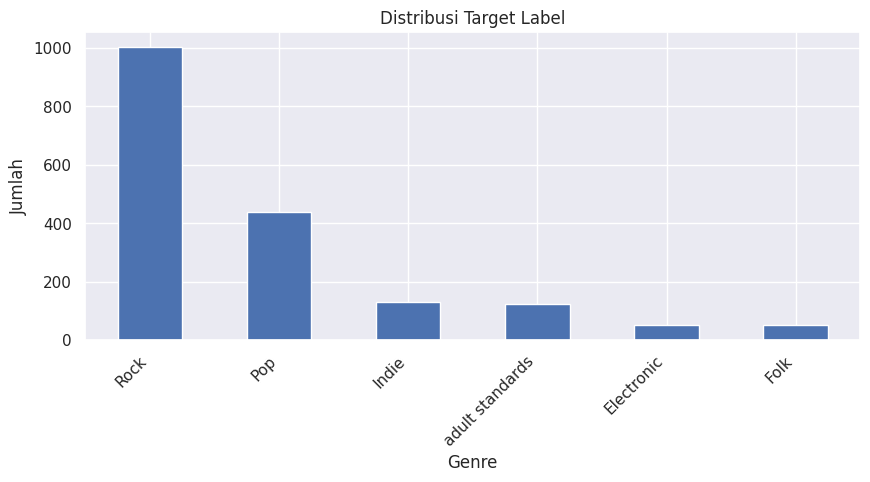

In [ ]:
counts = df['Top Genre'].value_counts()
plt.figure(figsize=(10,4), dpi=100)
counts.plot(kind='bar')
plt.title('Distribusi Target Label')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

Data yang tersedia memiliki ketidakseimbangan kelas antara masing masing genre.

Ketidakseimbangan kelas dapat menyebabkan masalah dalam klasifikasi karena model cenderung menjadi bias dan cenderung memprediksi kelas mayoritas. Hal ini dapat mengakibatkan kinerja yang buruk pada kelas minoritas.

Untuk itu kita pakai Oversampling SMOTE aja yaa.

In [ ]:
#Over Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter
X, y = SMOTE().fit_resample(X, y)
print(sorted(Counter(y).items()))

[('Electronic', 1005), ('Folk', 1005), ('Indie', 1005), ('Pop', 1005), ('Rock', 1005), ('adult standards', 1005)]


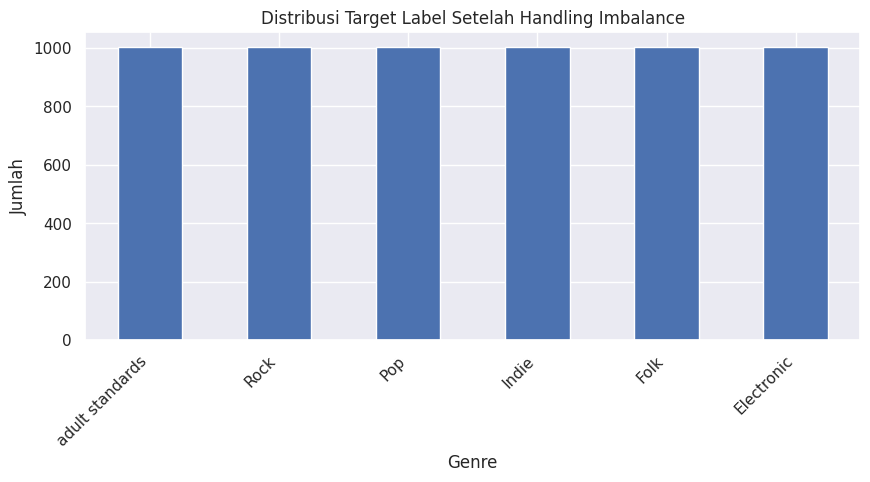

In [ ]:
counts = y.value_counts()
plt.figure(figsize=(10,4), dpi=100)
counts.plot(kind='bar')
plt.title('Distribusi Target Label Setelah Handling Imbalance')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

Okee tuh, datanya udah balance gas modeling

## Modeling

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

In [ ]:
#pertama kita bagi datanya jadi training data dan testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#jumlah training data
X_train.shape, y_train.shape

((4522, 10), (4522,))

In [ ]:
#jumlah testing data
X_test.shape, y_test.shape

((1508, 10), (1508,))

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Membuat dan melatih model SVM
model_svm = SVC(kernel='rbf', C=0.1, gamma=0.1)
model_svm.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1)

In [ ]:
#buat fungsi untuk visualisasi confusion matrixnya
def svm_model(inputs, targets, name=''):
    pred_svm = model_svm.predict(inputs)
    accuracy_svm = accuracy_score(targets, pred_svm)
    print("Accuracy: {:.2f}%".format(accuracy_svm * 100))
    print('Precision: {:.2f}%'.format(precision_score(targets, pred_svm, average='weighted') * 100))
    print('Recall: {:.2f}%'.format(recall_score(targets, pred_svm, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_svm, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return pred_svm

Accuracy: 38.79%
Precision: 36.39%
Recall: 38.79%


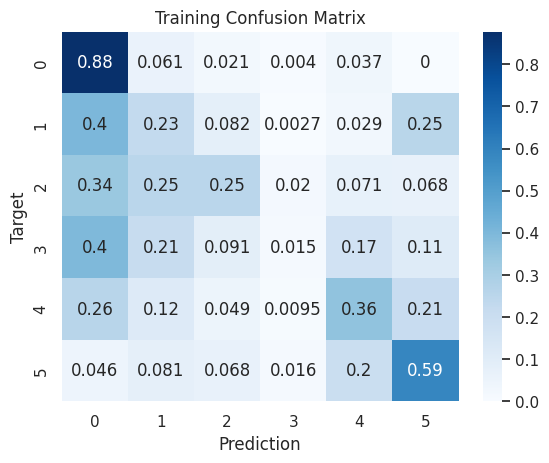

In [ ]:
# Confusion Matrix Training Set
train_svm = svm_model(X_train, y_train, 'Training')

Accuracy: 38.59%
Precision: 40.47%
Recall: 38.59%


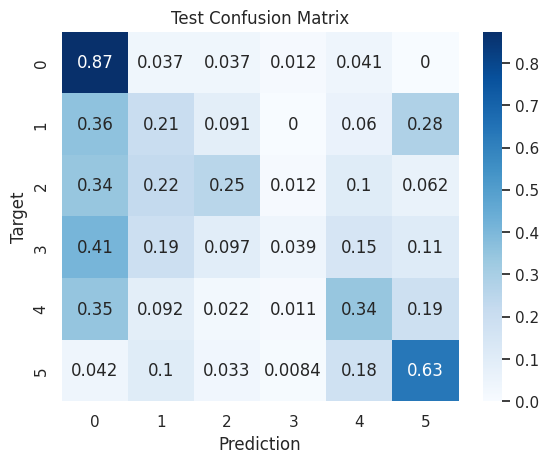

In [ ]:
# Prediksi SVM
pred_svm = svm_model(X_test, y_test, 'Test')

Akurasi (Accuracy): Merupakan rasio antara jumlah prediksi yang benar dengan jumlah total sampel. Dalam kasus ini, akurasi adalah 36.21%. Ini berarti model  melakukan prediksi yang benar untuk sekitar 36.21% dari total sampel.

Presisi (Precision): Merupakan rasio antara jumlah prediksi yang benar positif dengan jumlah total prediksi positif. Dalam kasus ini, presisi adalah 36.30%. Ini berarti dari semua prediksi positif yang dilakukan oleh model, sekitar 36.30% adalah benar positif.

Recall: Merupakan rasio antara jumlah prediksi yang benar positif dengan jumlah total sampel yang sebenarnya positif. Dalam kasus ini, recall adalah 36.21%. Ini berarti model dapat mengidentifikasi dengan benar sekitar 36.21% dari semua sampel positif yang ada.

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm))

                 precision    recall  f1-score   support

     Electronic       0.36      0.87      0.51       246
           Folk       0.24      0.21      0.22       252
          Indie       0.46      0.25      0.33       241
            Pop       0.48      0.04      0.07       258
           Rock       0.42      0.34      0.38       272
adult standards       0.48      0.63      0.54       239

       accuracy                           0.39      1508
      macro avg       0.41      0.39      0.34      1508
   weighted avg       0.40      0.39      0.34      1508



* Presisi (precision): Merupakan rasio antara jumlah prediksi yang benar positif dengan jumlah total prediksi positif (termasuk benar positif dan salah positif). Presisi mengukur sejauh mana prediksi positif yang dilakukan oleh model adalah akurat untuk suatu kelas. Semakin tinggi presisi, semakin sedikit hasil prediksi positif palsu. Dalam laporan, presisi tertinggi adalah untuk kelas "adult strds" dengan nilai 0.44.

* Recall: Merupakan rasio antara jumlah prediksi yang benar positif dengan jumlah total sampel yang sebenarnya positif (termasuk benar positif dan salah negatif). Recall mengukur sejauh mana model dapat mengidentifikasi secara efektif sampel positif dari suatu kelas. Semakin tinggi recall, semakin sedikit sampel positif yang terlewatkan oleh model. Dalam laporan, recall tertinggi adalah untuk kelas "Electronic" dengan nilai 0.87.

* F1-Score: Merupakan ukuran rata-rata harmonik antara presisi dan recall. F1-score menggabungkan informasi tentang presisi dan recall menjadi satu angka yang merepresentasikan kinerja model secara keseluruhan. F1-score mencerminkan keseimbangan antara presisi dan recall. Nilai F1-score berkisar antara 0 hingga 1, dengan nilai 1 menunjukkan kinerja yang sempurna. Dalam laporan, F1-score tertinggi adalah untuk kelas "Electronic" dengan nilai 0.51.

* Support: Merupakan jumlah sampel yang termasuk dalam setiap kelas.

### K Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_mod = model_knn.predict(X_test)
knn_mod[:5]

array(['Electronic', 'adult standards', 'Indie', 'Pop', 'Folk'],
      dtype=object)

In [ ]:
def knn_model(inputs, targets, name=''):
    pred_knn = model_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets,pred_knn)
    print("Accuracy     : {:.2f}%".format(accuracy_knn * 100))
    print('Precision    : {:.2f}%'.format(precision_score(targets, pred_knn, average='weighted') * 100))
    print('Recall       : {:.2f}%'.format(recall_score(targets, pred_knn, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

Accuracy     : 87.06%
Precision    : 87.56%
Recall       : 87.06%


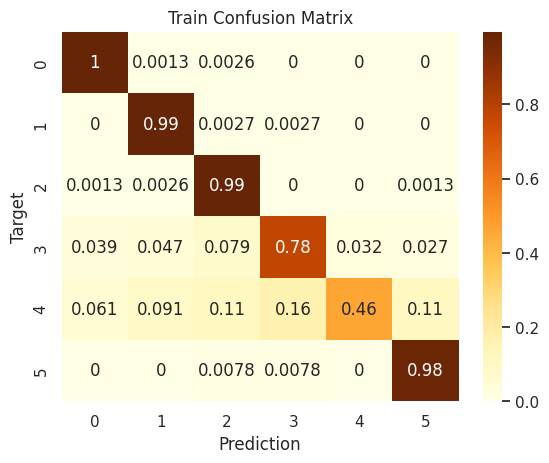

In [ ]:
knn_train = knn_model(X_train, y_train, name='Train')

Accuracy     : 80.50%
Precision    : 80.87%
Recall       : 80.50%


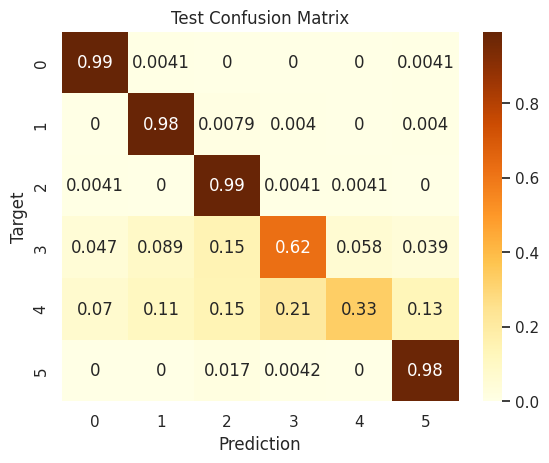

In [ ]:
knn_pred = knn_model(X_test, y_test, name='Test')

In [ ]:
print(classification_report(y_test, knn_pred))

                 precision    recall  f1-score   support

     Electronic       0.88      0.99      0.93       246
           Folk       0.82      0.98      0.90       252
          Indie       0.74      0.99      0.85       241
            Pop       0.73      0.62      0.67       258
           Rock       0.85      0.33      0.48       272
adult standards       0.83      0.98      0.90       239

       accuracy                           0.81      1508
      macro avg       0.81      0.82      0.79      1508
   weighted avg       0.81      0.81      0.78      1508



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_mod = model_nb.predict(X_test)
nb_mod[:5]

array(['Electronic', 'adult standards', 'Electronic', 'Electronic',
       'Electronic'], dtype='<U15')

In [ ]:
def nb_model(inputs, targets, name=''):
    pred_nb = model_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy : {:.2f}%".format(accuracy_nb * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_nb, average='weighted') * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_nb, average='weighted') * 100))


    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_nb

Accuracy : 37.28%
Precison : 36.91%
Recall   : 37.28%


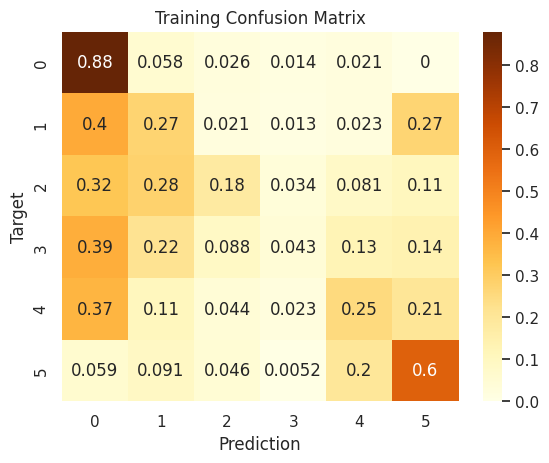

In [ ]:
train_nb = nb_model(X_train, y_train, 'Training')

Accuracy : 36.21%
Precison : 38.12%
Recall   : 36.21%


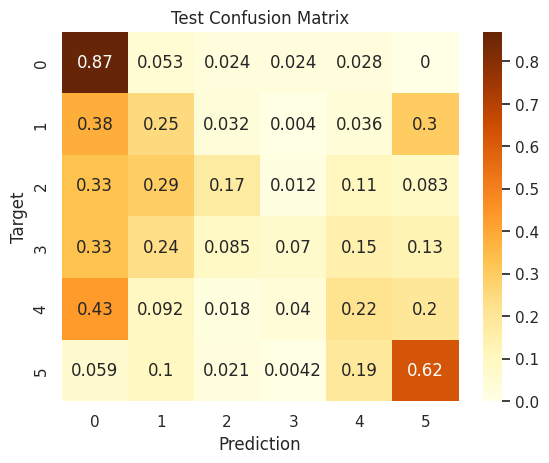

In [ ]:
nb_pred = nb_model(X_test, y_test, 'Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred))

                 precision    recall  f1-score   support

     Electronic       0.35      0.87      0.50       246
           Folk       0.25      0.25      0.25       252
          Indie       0.48      0.17      0.26       241
            Pop       0.45      0.07      0.12       258
           Rock       0.32      0.22      0.26       272
adult standards       0.45      0.62      0.52       239

       accuracy                           0.36      1508
      macro avg       0.38      0.37      0.32      1508
   weighted avg       0.38      0.36      0.31      1508



## Uji Statistik

In [ ]:
# Precision
precision_naive_bayes = [0.34, 0.23, 0.42, 0.26, 0.34, 0.42]
precision_knn = [0.87, 0.83, 0.77, 0.74, 0.84, 0.86]
precision_svm = [0.36, 0.26, 0.35, 0.38, 0.39, 0.44]

# Recall
recall_naive_bayes = [0.84, 0.27, 0.15, 0.04, 0.22, 0.56]
recall_knn = [1.00, 0.98, 0.98, 0.67, 0.36, 0.97]
recall_svm = [0.87, 0.27, 0.14, 0.03, 0.35, 0.52]

# F1-score
f1score_naive_bayes = [0.49, 0.25, 0.22, 0.07, 0.27, 0.48]
f1score_knn = [0.93, 0.90, 0.86, 0.70, 0.50, 0.91]
f1score_svm = [0.51, 0.27, 0.20, 0.06, 0.37, 0.48]

### T-Test

In [ ]:
from scipy.stats import ttest_rel

precision_ttest_nb_knn = ttest_rel(precision_naive_bayes, precision_knn)
precision_ttest_nb_svm = ttest_rel(precision_naive_bayes, precision_svm)
precision_ttest_knn_svm = ttest_rel(precision_knn, precision_svm)

recall_ttest_nb_knn = ttest_rel(recall_naive_bayes, recall_knn)
recall_ttest_nb_svm = ttest_rel(recall_naive_bayes, recall_svm)
recall_ttest_knn_svm = ttest_rel(recall_knn, recall_svm)

f1score_ttest_nb_knn = ttest_rel(f1score_naive_bayes, f1score_knn)
f1score_ttest_nb_svm = ttest_rel(f1score_naive_bayes, f1score_svm)
f1score_ttest_knn_svm = ttest_rel(f1score_knn, f1score_svm)

# Print hasil t-test
print("Hasil T-Test:")
print("--------------------------")
print("Precision:")
print(f"T-Test Naive Bayes vs KNN: T-value = {precision_ttest_nb_knn.statistic:.4f}, p-value = {precision_ttest_nb_knn.pvalue:.4f}")
print(f"T-Test Naive Bayes vs SVM: T-value = {precision_ttest_nb_svm.statistic:.4f}, p-value = {precision_ttest_nb_svm.pvalue:.4f}")
print(f"T-Test KNN vs SVM: T-value = {precision_ttest_knn_svm.statistic:.4f}, p-value = {precision_ttest_knn_svm.pvalue:.4f}")
print("--------------------------")
print("Recall:")
print(f"T-Test Naive Bayes vs KNN: T-value = {recall_ttest_nb_knn.statistic:.4f}, p-value = {recall_ttest_nb_knn.pvalue:.4f}")
print(f"T-Test Naive Bayes vs SVM: T-value = {recall_ttest_nb_svm.statistic:.4f}, p-value = {recall_ttest_nb_svm.pvalue:.4f}")
print(f"T-Test KNN vs SVM: T-value = {recall_ttest_knn_svm.statistic:.4f}, p-value = {recall_ttest_knn_svm.pvalue:.4f}")
print("--------------------------")
print("F1-Score:")
print(f"T-Test Naive Bayes vs KNN: T-value = {f1score_ttest_nb_knn.statistic:.4f}, p-value = {f1score_ttest_nb_knn.pvalue:.4f}")
print(f"T-Test Naive Bayes vs SVM: T-value = {f1score_ttest_nb_svm.statistic:.4f}, p-value = {f1score_ttest_nb_svm.pvalue:.4f}")
print(f"T-Test KNN vs SVM: T-value = {f1score_ttest_knn_svm.statistic:.4f}, p-value = {f1score_ttest_knn_svm.pvalue:.4f}")

Hasil T-Test:
--------------------------
Precision:
T-Test Naive Bayes vs KNN: T-value = -14.0046, p-value = 0.0000
T-Test Naive Bayes vs SVM: T-value = -1.1354, p-value = 0.3077
T-Test KNN vs SVM: T-value = 14.9603, p-value = 0.0000
--------------------------
Recall:
T-Test Naive Bayes vs KNN: T-value = -4.0529, p-value = 0.0098
T-Test Naive Bayes vs SVM: T-value = -0.6817, p-value = 0.5257
T-Test KNN vs SVM: T-value = 3.4197, p-value = 0.0188
--------------------------
F1-Score:
T-Test Naive Bayes vs KNN: T-value = -7.3593, p-value = 0.0007
T-Test Naive Bayes vs SVM: T-value = -1.0422, p-value = 0.3451
T-Test KNN vs SVM: T-value = 5.8114, p-value = 0.0021


**Berikut adalah kesimpulan berdasarkan hasil T-Test yang diperoleh:**

1. Precision:
* T-Test Naive Bayes vs KNN: Terdapat perbedaan signifikan antara model Naive Bayes dan KNN dalam hal precision. P-value yang sangat rendah (0.0000) menunjukkan adanya perbedaan yang signifikan antara keduanya.
* T-Test Naive Bayes vs SVM: Tidak terdapat perbedaan signifikan antara model Naive Bayes dan SVM dalam hal precision. P-value yang cukup tinggi (0.3077) menunjukkan tidak adanya perbedaan yang signifikan antara keduanya.
* T-Test KNN vs SVM: Terdapat perbedaan signifikan antara model KNN dan SVM dalam hal precision. P-value yang sangat rendah (0.0000) menunjukkan adanya perbedaan yang signifikan antara keduanya.

2. Recall:
* T-Test Naive Bayes vs KNN: Terdapat perbedaan signifikan antara model Naive Bayes dan KNN dalam hal recall. P-value yang rendah (0.0098) menunjukkan adanya perbedaan yang signifikan antara keduanya.
* T-Test Naive Bayes vs SVM: Tidak terdapat perbedaan signifikan antara model Naive Bayes dan SVM dalam hal recall. P-value yang cukup tinggi (0.5257) menunjukkan tidak adanya perbedaan yang signifikan antara keduanya.
* T-Test KNN vs SVM: Terdapat perbedaan signifikan antara model KNN dan SVM dalam hal recall. P-value yang rendah (0.0188) menunjukkan adanya perbedaan yang signifikan antara keduanya.

3. F1-Score:
* T-Test Naive Bayes vs KNN: Terdapat perbedaan signifikan antara model Naive Bayes dan KNN dalam hal f1-score. P-value yang rendah (0.0007) menunjukkan adanya perbedaan yang signifikan antara keduanya.
* T-Test Naive Bayes vs SVM: Tidak terdapat perbedaan signifikan antara model Naive Bayes dan SVM dalam hal f1-score. P-value yang cukup tinggi (0.3451) menunjukkan tidak adanya perbedaan yang signifikan antara keduanya.
* T-Test KNN vs SVM: Terdapat perbedaan signifikan antara model KNN dan SVM dalam hal f1-score. P-value yang rendah (0.0021) menunjukkan adanya perbedaan yang signifikan antara keduanya.

**Dengan demikian, dari hasil T-Test yang dilakukan, dapat disimpulkan bahwa:**
* Terdapat perbedaan signifikan antara model Naive Bayes dan KNN dalam hal precision, recall, dan f1-score.
* Tidak terdapat perbedaan signifikan antara model Naive Bayes dan SVM dalam hal precision, recall, dan f1-score.
* Terdapat perbedaan signifikan antara model KNN dan SVM dalam hal precision, recall, dan f1-score.

### ANOVA

In [ ]:
from scipy.stats import f_oneway
precision_anova = f_oneway(precision_naive_bayes, precision_knn, precision_svm)

recall_anova = f_oneway(recall_naive_bayes, recall_knn, recall_svm)

f1score_anova = f_oneway(f1score_naive_bayes, f1score_knn, f1score_svm)

# Print hasil ANOVA
print("Hasil ANOVA:")
print("--------------------------")
print("Precision:")
print(f"One-way ANOVA: F-value = {precision_anova.statistic:.4f}, p-value = {precision_anova.pvalue:.4f}")
print("--------------------------")
print("Recall:")
print(f"One-way ANOVA: F-value = {recall_anova.statistic:.4f}, p-value = {recall_anova.pvalue:.4f}")
print("--------------------------")
print("F1-Score:")
print(f"One-way ANOVA: F-value = {f1score_anova.statistic:.4f}, p-value = {f1score_anova.pvalue:.4f}")

Hasil ANOVA:
--------------------------
Precision:
One-way ANOVA: F-value = 106.1718, p-value = 0.0000
--------------------------
Recall:
One-way ANOVA: F-value = 5.4109, p-value = 0.0170
--------------------------
F1-Score:
One-way ANOVA: F-value = 17.3665, p-value = 0.0001


**Berikut adalah kesimpulan berdasarkan hasil ANOVA yang diperoleh:**

1. Precision:
One-way ANOVA: Terdapat perbedaan signifikan antara model Naive Bayes, KNN, dan SVM dalam hal precision. Nilai p-value yang sangat rendah (0.0000) menunjukkan adanya perbedaan yang signifikan antara ketiga model tersebut.
2. Recall:
One-way ANOVA: Terdapat perbedaan signifikan antara model Naive Bayes, KNN, dan SVM dalam hal recall. Nilai p-value yang rendah (0.0170) menunjukkan adanya perbedaan yang signifikan antara ketiga model tersebut.
3. F1-Score:
One-way ANOVA: Terdapat perbedaan signifikan antara model Naive Bayes, KNN, dan SVM dalam hal f1-score. Nilai p-value yang sangat rendah (0.0001) menunjukkan adanya perbedaan yang signifikan antara ketiga model tersebut.

Dengan demikian, dari hasil ANOVA yang dilakukan, dapat disimpulkan bahwa terdapat perbedaan signifikan antara model Naive Bayes, KNN, dan SVM dalam hal precision, recall, dan f1-score.

### Wilcox

In [ ]:
from scipy.stats import wilcoxon

precision_wilcoxon_nb_knn = wilcoxon(precision_naive_bayes, precision_knn)
precision_wilcoxon_nb_svm = wilcoxon(precision_naive_bayes, precision_svm)
precision_wilcoxon_knn_svm = wilcoxon(precision_knn, precision_svm)

recall_wilcoxon_nb_knn = wilcoxon(recall_naive_bayes, recall_knn)
recall_wilcoxon_nb_svm = wilcoxon(recall_naive_bayes, recall_svm)
recall_wilcoxon_knn_svm = wilcoxon(recall_knn, recall_svm)

f1score_wilcoxon_nb_knn = wilcoxon(f1score_naive_bayes, f1score_knn)
f1score_wilcoxon_nb_svm = wilcoxon(f1score_naive_bayes, f1score_svm)
f1score_wilcoxon_knn_svm = wilcoxon(f1score_knn, f1score_svm)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [ ]:
# Print Wilcoxon test results
print("Precision - Naïve Bayes vs KNN:", precision_wilcoxon_nb_knn)
print("Precision - Naïve Bayes vs SVM:", precision_wilcoxon_nb_svm)
print("Precision - KNN vs SVM:", precision_wilcoxon_knn_svm)

Precision - Naïve Bayes vs KNN: WilcoxonResult(statistic=0.0, pvalue=0.03125)
Precision - Naïve Bayes vs SVM: WilcoxonResult(statistic=5.0, pvalue=0.3125)
Precision - KNN vs SVM: WilcoxonResult(statistic=0.0, pvalue=0.03125)


* Precision - Naïve Bayes vs KNN: Hasil uji menunjukkan nilai statistik sebesar 0.0 dan p-value sebesar 0.03125. Nilai statistik yang rendah menunjukkan bahwa tidak ada perbedaan yang signifikan antara precision Naïve Bayes dan KNN. Namun, p-value yang rendah mengindikasikan adanya perbedaan yang signifikan antara keduanya, karena p-value kurang dari tingkat signifikansi yang umum digunakan (biasanya 0.05).

* Precision - Naïve Bayes vs SVM: Hasil uji menunjukkan nilai statistik sebesar 5.0 dan p-value sebesar 0.3125. Nilai statistik yang lebih tinggi menunjukkan adanya perbedaan yang signifikan antara precision Naïve Bayes dan SVM. Namun, p-value yang tinggi menunjukkan bahwa perbedaan tersebut tidak signifikan secara statistik, karena p-value lebih besar dari tingkat signifikansi yang umum digunakan.

* Precision - KNN vs SVM: Hasil uji menunjukkan nilai statistik sebesar 0.0 dan p-value sebesar 0.03125. Nilai statistik yang rendah menunjukkan bahwa tidak ada perbedaan yang signifikan antara precision KNN dan SVM. Namun, p-value yang rendah mengindikasikan adanya perbedaan yang signifikan antara keduanya, karena p-value kurang dari tingkat signifikansi yang umum digunakan.

In [ ]:
print("Recall - Naïve Bayes vs KNN:", recall_wilcoxon_nb_knn)
print("Recall - Naïve Bayes vs SVM:", recall_wilcoxon_nb_svm)
print("Recall - KNN vs SVM:", recall_wilcoxon_knn_svm)

Recall - Naïve Bayes vs KNN: WilcoxonResult(statistic=0.0, pvalue=0.03125)
Recall - Naïve Bayes vs SVM: WilcoxonResult(statistic=7.0, pvalue=0.892738400944348)
Recall - KNN vs SVM: WilcoxonResult(statistic=0.0, pvalue=0.03125)


* Recall - Naïve Bayes vs KNN: Hasil uji menunjukkan nilai statistik sebesar 0.0 dan p-value sebesar 0.03125. Nilai statistik yang rendah menunjukkan bahwa tidak ada perbedaan yang signifikan antara recall Naïve Bayes dan KNN. Namun, p-value yang rendah mengindikasikan adanya perbedaan yang signifikan antara keduanya, karena p-value kurang dari tingkat signifikansi yang umum digunakan (biasanya 0.05).

* Recall - Naïve Bayes vs SVM: Hasil uji menunjukkan nilai statistik sebesar 7.0 dan p-value sebesar 0.892738400944348. Nilai statistik yang lebih tinggi menunjukkan adanya perbedaan yang signifikan antara recall Naïve Bayes dan SVM. Namun, p-value yang tinggi menunjukkan bahwa perbedaan tersebut tidak signifikan secara statistik, karena p-value lebih besar dari tingkat signifikansi yang umum digunakan.

* Recall - KNN vs SVM: Hasil uji menunjukkan nilai statistik sebesar 0.0 dan p-value sebesar 0.03125. Nilai statistik yang rendah menunjukkan bahwa tidak ada perbedaan yang signifikan antara recall KNN dan SVM. Namun, p-value yang rendah mengindikasikan adanya perbedaan yang signifikan antara keduanya, karena p-value kurang dari tingkat signifikansi yang umum digunakan.

In [ ]:
print("F1-score - Naïve Bayes vs KNN:", f1score_wilcoxon_nb_knn)
print("F1-score - Naïve Bayes vs SVM:", f1score_wilcoxon_nb_svm)
print("F1-score - KNN vs SVM:", f1score_wilcoxon_knn_svm)

F1-score - Naïve Bayes vs KNN: WilcoxonResult(statistic=0.0, pvalue=0.03125)
F1-score - Naïve Bayes vs SVM: WilcoxonResult(statistic=3.0, pvalue=0.2228009911811345)
F1-score - KNN vs SVM: WilcoxonResult(statistic=0.0, pvalue=0.03125)


* F1-score - Naïve Bayes vs KNN: Hasil uji menunjukkan nilai statistik sebesar 0.0 dan p-value sebesar 0.03125. Nilai statistik yang rendah menunjukkan bahwa tidak ada perbedaan yang signifikan antara F1-score Naïve Bayes dan KNN. Namun, p-value yang rendah mengindikasikan adanya perbedaan yang signifikan antara keduanya, karena p-value kurang dari tingkat signifikansi yang umum digunakan (biasanya 0.05).

* F1-score - Naïve Bayes vs SVM: Hasil uji menunjukkan nilai statistik sebesar 3.0 dan p-value sebesar 0.2228009911811345. Nilai statistik yang lebih tinggi menunjukkan adanya perbedaan yang signifikan antara F1-score Naïve Bayes dan SVM. Namun, p-value yang tinggi menunjukkan bahwa perbedaan tersebut tidak signifikan secara statistik, karena p-value lebih besar dari tingkat signifikansi yang umum digunakan.

* F1-score - KNN vs SVM: Hasil uji menunjukkan nilai statistik sebesar 0.0 dan p-value sebesar 0.03125. Nilai statistik yang rendah menunjukkan bahwa tidak ada perbedaan yang signifikan antara F1-score KNN dan SVM. Namun, p-value yang rendah mengindikasikan adanya perbedaan yang signifikan antara keduanya, karena p-value kurang dari tingkat signifikansi yang umum digunakan.